# Projet Imagerie Médicale & IA / MICCAI

CHEN Cyril

Le projet consiste à faire de l'analyse d'image médical (IRM pour inductance résonance magnétique) à l'aide de l'intelligence artificielle. Nous avons à notre possesions des données T1, T2 et VT (vérité terrain). Le but est de détecter potentiellement des troubles de développement liée au cerveau. Nous allons donc faire la séparation entre la matière blanche et la matière grise dans les cerveaux pour detecter ces potentielles troubles de développement.

### Importation des bibliothèques nécessaires pour la réalisation du projet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import skimage.io as io
import skimage.transform as trans

### STEP 1 : Chargement et affichage des données

Nous allons implémenter une fonctions **display_image** qui prendra un nombre de variable d’images en deux dimensions (2D) en tant qu’arguments et les affiche dans une grille utilisant Matplotlib. La fonction va juste afficher les images.

In [2]:
def display_image(*img_2d):
    # Définit la taille de la figure
    plt.figure(figsize=(16,8))
    # Nombre d'images à afficher
    nb_img = len(img_2d)
    # Nombre maximal de colonnes par ligne
    column = min(9, nb_img)
    # Nombre de lignes nécessaires pour afficher toutes les images
    row = (nb_img // column) + 1
    # Parcours de chaque image et ajout à la figure
    for i, img2d in enumerate(img_2d):
        # Sélectionne la sous-figure correspondante
        plt.subplot(row, column, 1+i)
        # Affiche l'image en niveaux de gris
        plt.imshow(img2d)
    plt.show()

La fonction que nous allons implémenter est **print_image_3D**. Vu que nous allons manipuler des données 3D quand on gère les données en input, on voudrait afficher les images en 3D c-à-d x, y et z. Donc on aura des coupes de donnée 3D pour avoir une meilleur visualisation. La fonction prendra en argument une image.

In [3]:
def print_image_3D(img):
    print("Image shape:", img.shape)
    if len(img.shape) == 3:
        # Si l'image est 3D, extrait les dimensions des axes
        axe_x, axe_y, axe_z = img.shape
        # Affiche les coupes centrales dans les trois plans (x, y, z)
        display_image(img[axe_x//2, :, :], img[:, axe_y//2, :], img[:, :, axe_z//2])
    elif len(img.shape) == 4:
        # Si l'image est 4D (par exemple, avec un canal supplémentaire), extrait les dimensions des axes
        axe_x, axe_y, axe_z, _ = img.shape
        # Affiche les coupes centrales du premier canal dans les trois plans (x, y, z)
        display_image(img[axe_x//2, :, :, 0], img[:, axe_y//2, :, 0], img[:, :, axe_z//2, 0])
    else:
        raise ValueError("Unsupported image shape")

À l'aide des deux fonctions implémenté precédemment, nous allons pouvoir afficher les données.
Nous allons afficher les Coupes sagittale, coronale et axiale. Nous allons définir ce que veulent dire ces termes.
* Coupes sagittales : Images obtenues en coupant le cerveau verticalement de l’avant vers l’arrière, divisant le cerveau en parties gauche et droite.
* Coupes coronales : Images obtenues en coupant le cerveau verticalement d’un côté à l’autre, divisant le cerveau en parties avant (ventrale) et arrière (dorsale).
* Coupes axiales : Images obtenues en coupant le cerveau horizontalement, divisant le cerveau en parties supérieure (crânienne) et inférieure (caudale).

Nous allons manipuler des images T1, T2. Les images T1 et T2 sont des images obtenues par IRM et ce sont des modalités, c'est-à-dire que ce sont des captures de cerveau avec des machines spéciales qui nous permet d'avoir des visions différentes de même entité. De plus, les images T1 et T2 sont capturé par la même machines mais à un instant T différent. Les images T1 ont été prise en premier et les images T2 ont été captures quelques semaines plus tard (environ 2 semaines). Durant cet interval de temps T, on excite les molécules d'eau dans les cerveaux et au moment ou ça émet des champs magnétique, on capture ces informations et ça va nous donner les differentes images qui vont s'afficher en dessous.

Le fais d'avoir plus de modalité d'un même signal, plus on arrive à avoir de bons résultats parce qu'en plus on a de l'information sur la structure que l'on veut chercher.

Nous avons aussi la VT (vérité terrain). La VT est la solution aux problèmes qu'on cherche à faire résoudre aux réseaux.

Nous allons maintenant afficher les données des patiens.

NOUVEAU PATIENT : subject-6-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-6-label.img
Image shape: (144, 192, 256, 1)


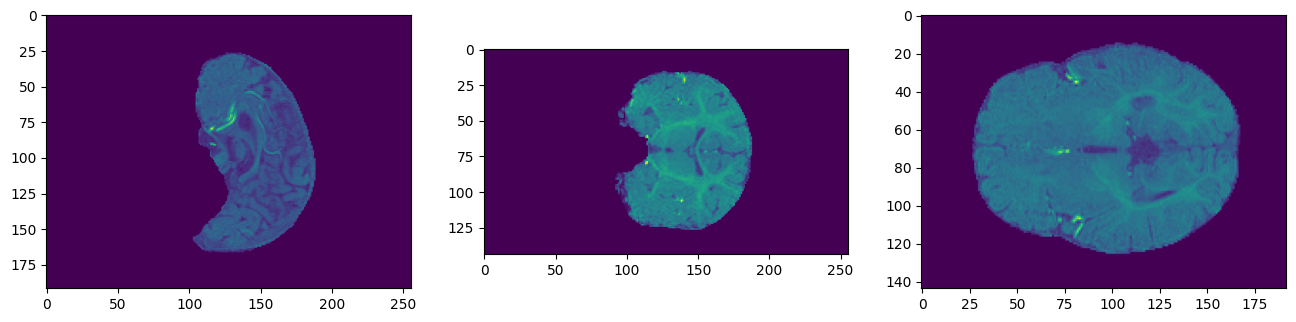

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-6-label.img
Image shape: (144, 192, 256, 1)


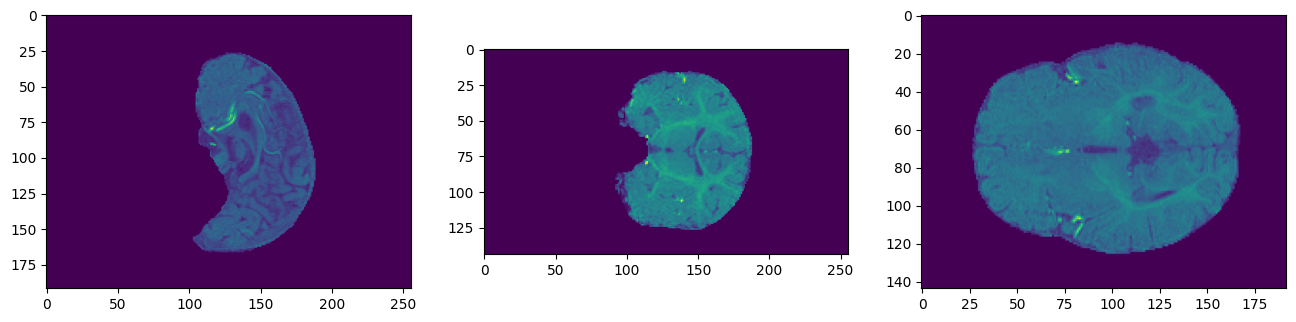

LABELS : Coupes sagittale (x), coronale (y), axiale (z) de subject-6-label.img
Image shape: (144, 192, 256, 1)


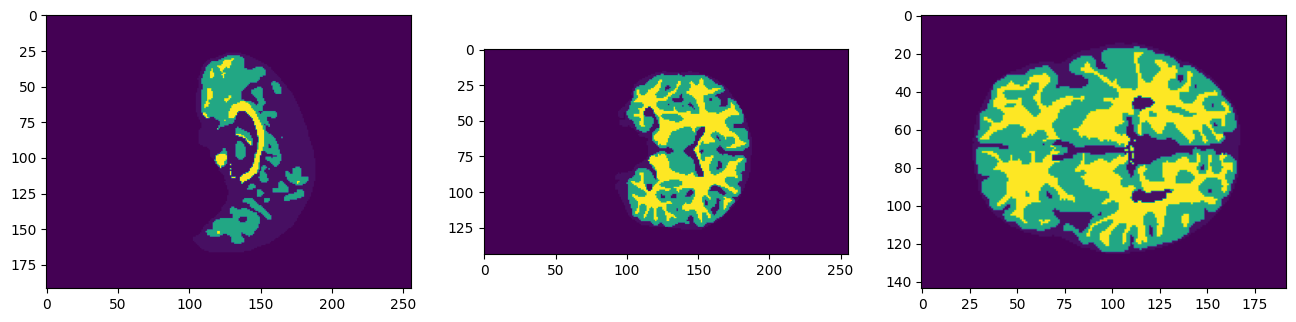

NOUVEAU PATIENT : subject-10-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-10-label.img
Image shape: (144, 192, 256, 1)


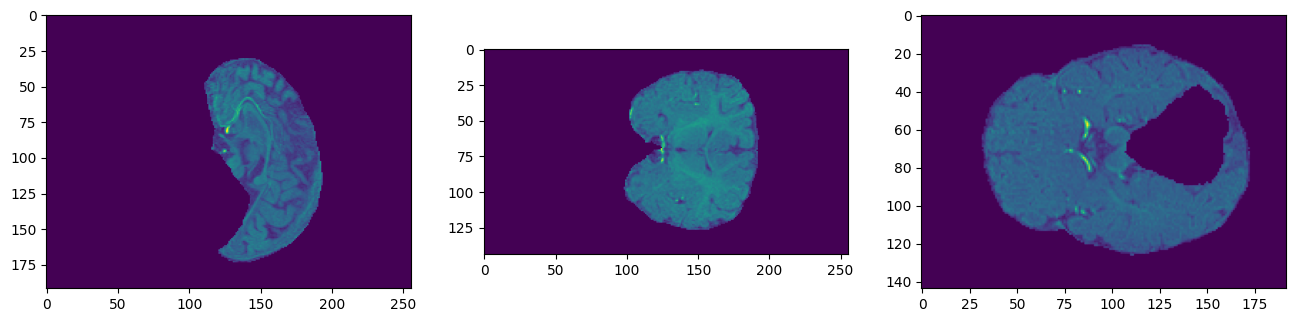

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-10-label.img
Image shape: (144, 192, 256, 1)


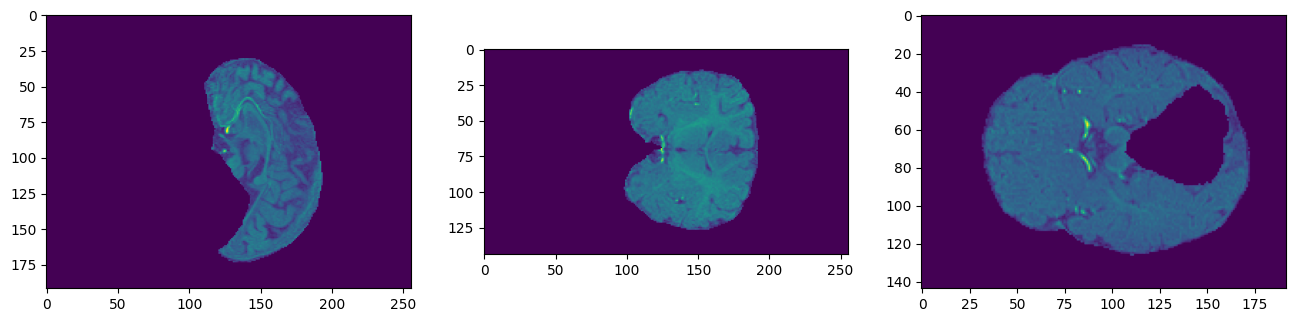

LABELS : Coupes sagittale (x), coronale (y), axiale (z) de subject-10-label.img
Image shape: (144, 192, 256, 1)


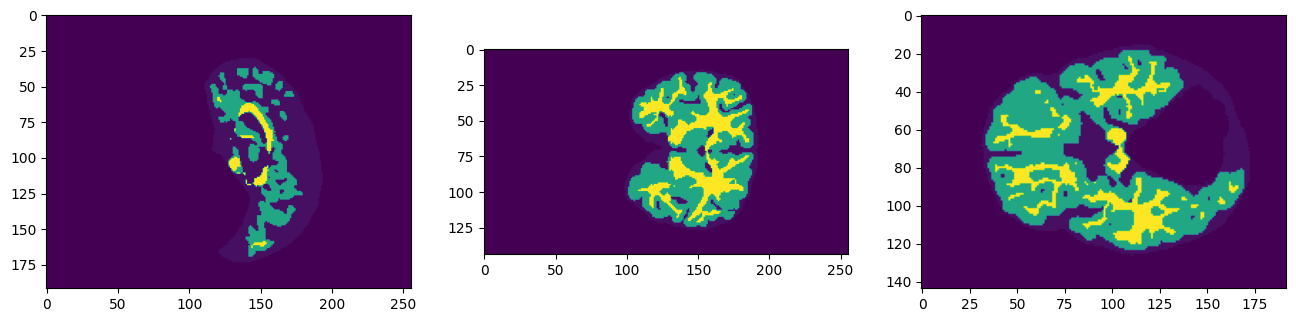

NOUVEAU PATIENT : subject-7-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-7-label.img
Image shape: (144, 192, 256, 1)


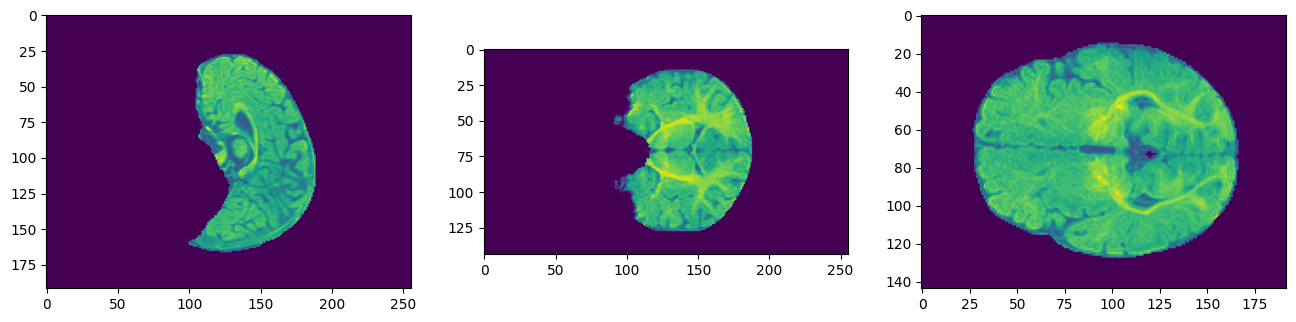

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-7-label.img
Image shape: (144, 192, 256, 1)


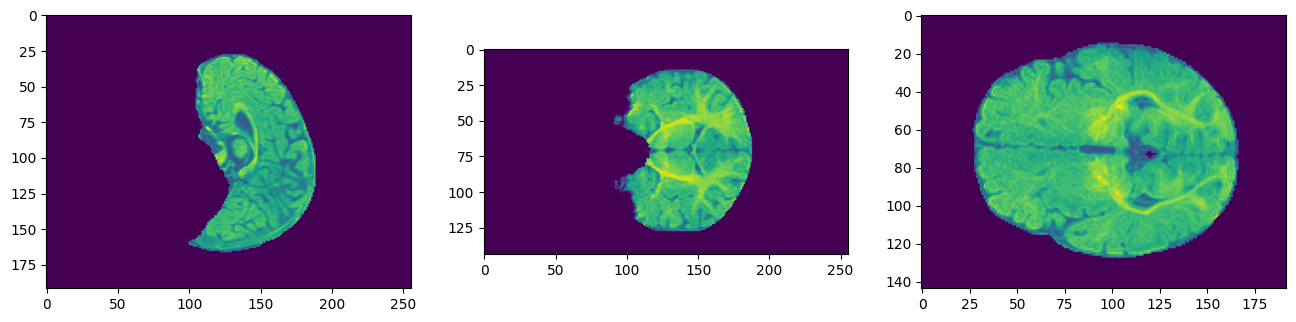

LABELS : Coupes sagittale (x), coronale (y), axiale (z) de subject-7-label.img
Image shape: (144, 192, 256, 1)


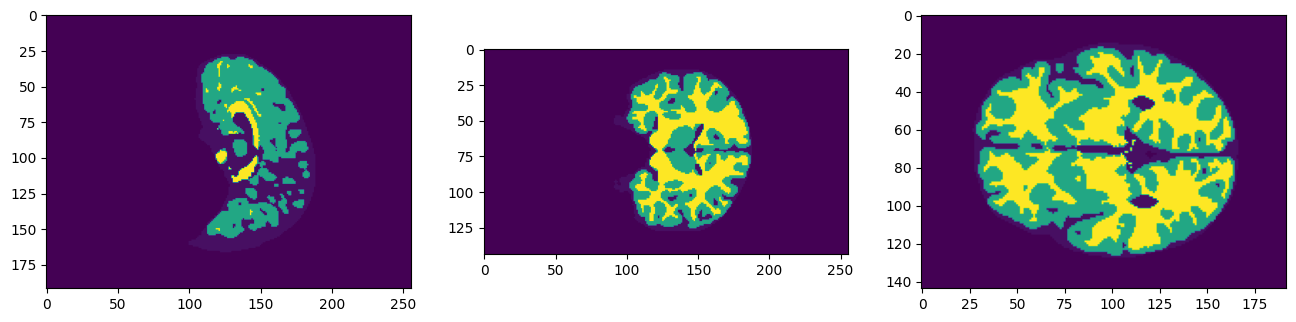

NOUVEAU PATIENT : subject-1-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-1-label.img
Image shape: (144, 192, 256, 1)


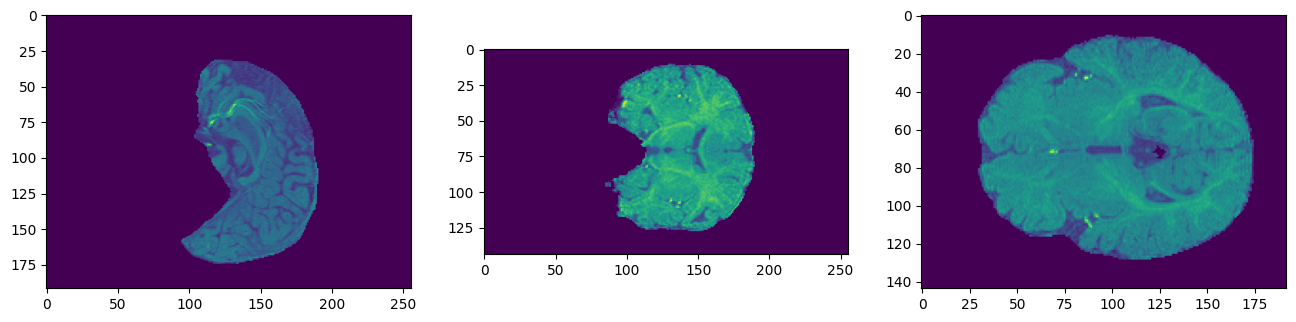

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-1-label.img
Image shape: (144, 192, 256, 1)


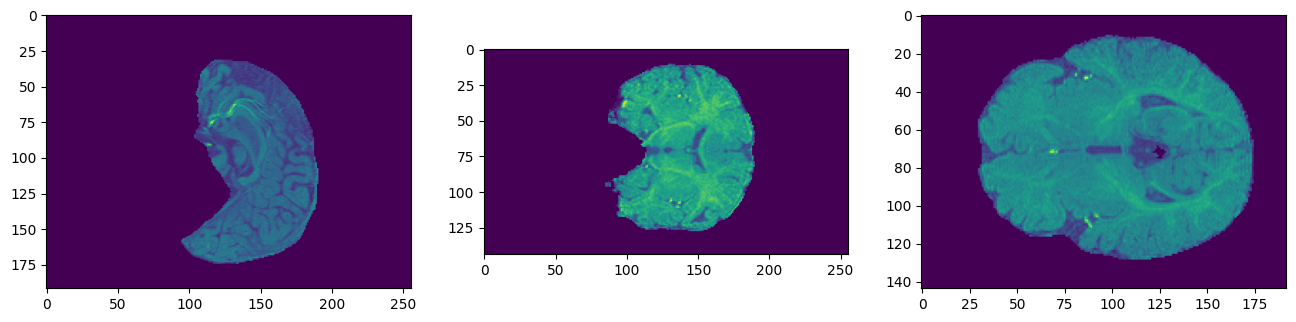

LABELS : Coupes sagittale (x), coronale (y), axiale (z) de subject-1-label.img
Image shape: (144, 192, 256, 1)


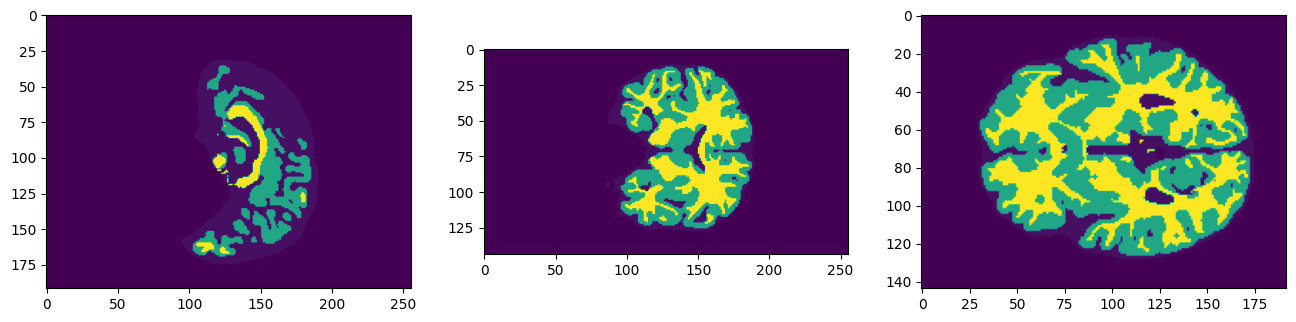

NOUVEAU PATIENT : subject-4-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-4-label.img
Image shape: (144, 192, 256, 1)


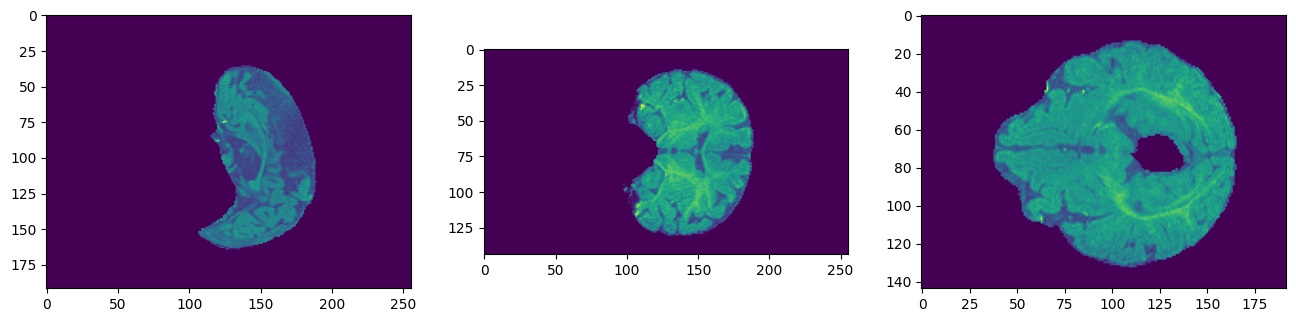

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-4-label.img
Image shape: (144, 192, 256, 1)


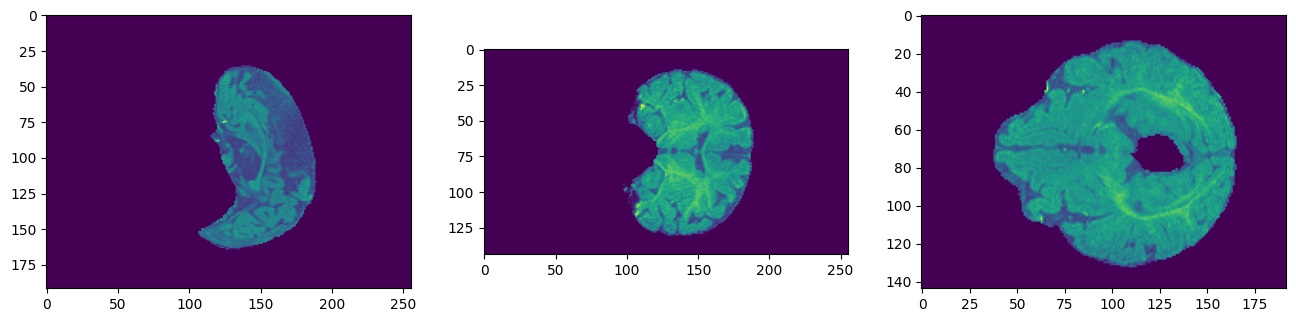

LABELS : Coupes sagittale (x), coronale (y), axiale (z) de subject-4-label.img
Image shape: (144, 192, 256, 1)


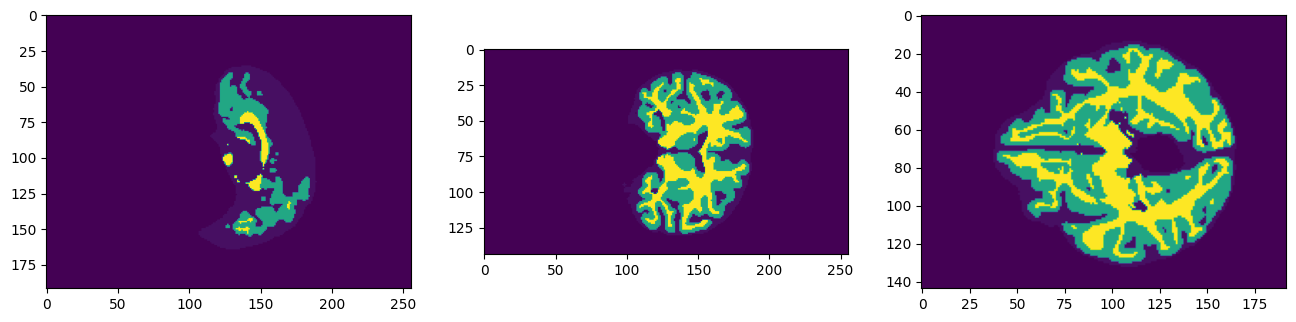

NOUVEAU PATIENT : subject-9-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-9-label.img
Image shape: (144, 192, 256, 1)


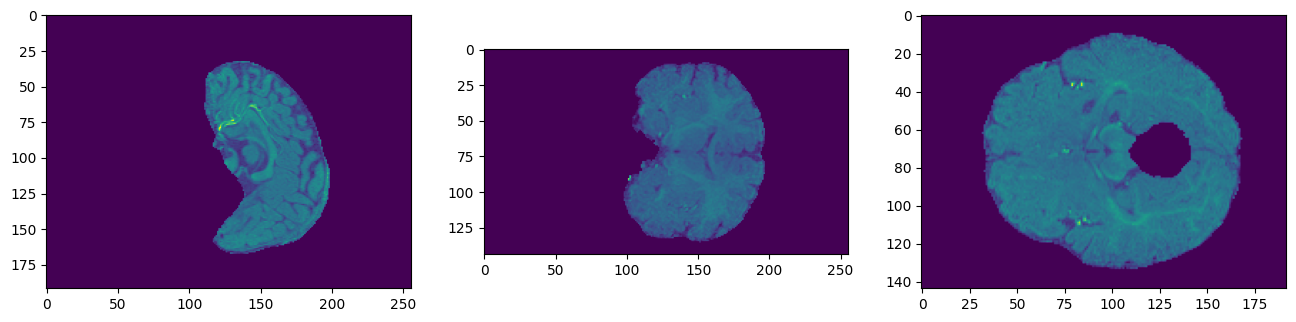

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-9-label.img
Image shape: (144, 192, 256, 1)


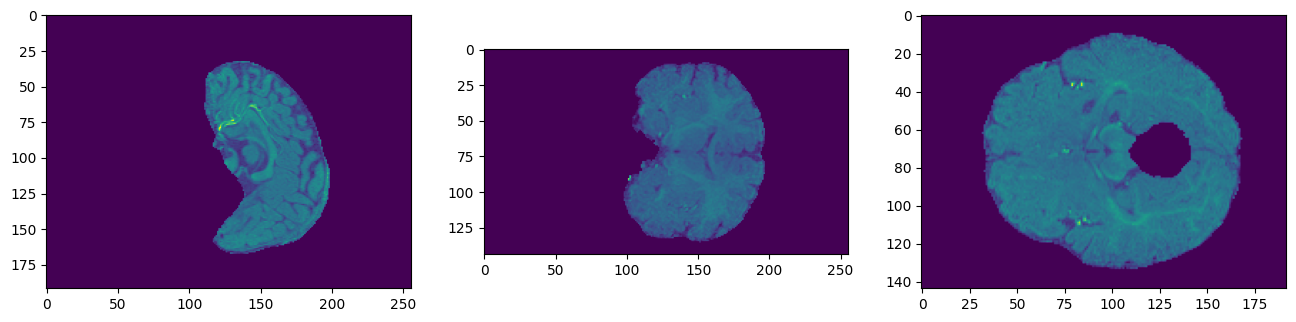

LABELS : Coupes sagittale (x), coronale (y), axiale (z) de subject-9-label.img
Image shape: (144, 192, 256, 1)


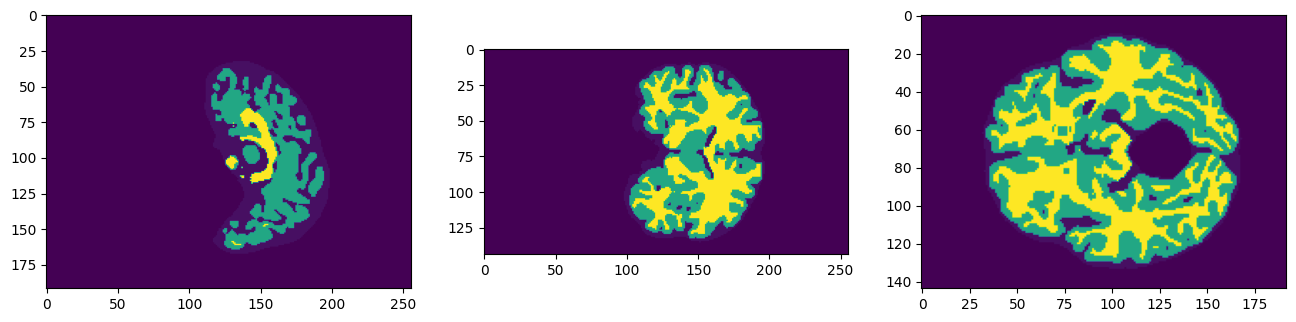

NOUVEAU PATIENT : subject-2-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-2-label.img
Image shape: (144, 192, 256, 1)


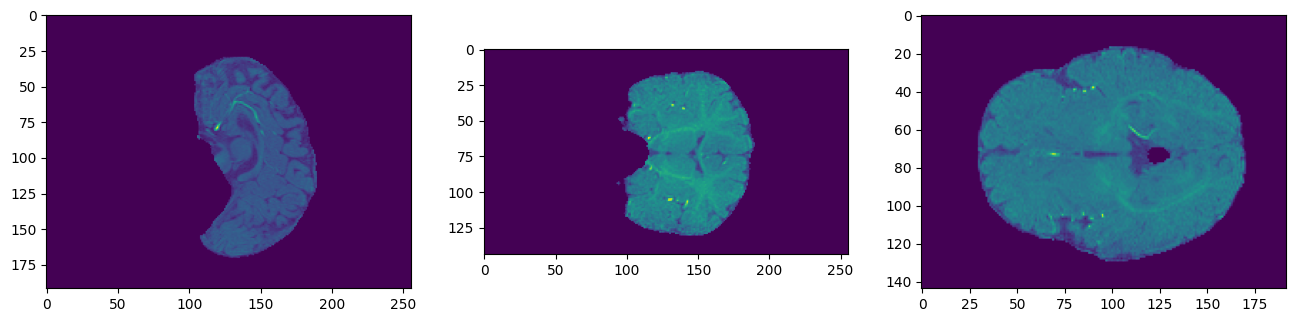

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-2-label.img
Image shape: (144, 192, 256, 1)


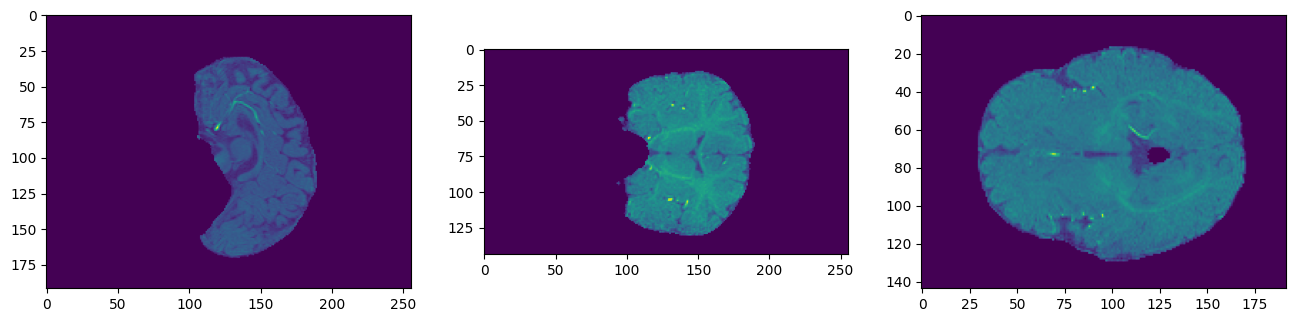

LABELS : Coupes sagittale (x), coronale (y), axiale (z) de subject-2-label.img
Image shape: (144, 192, 256, 1)


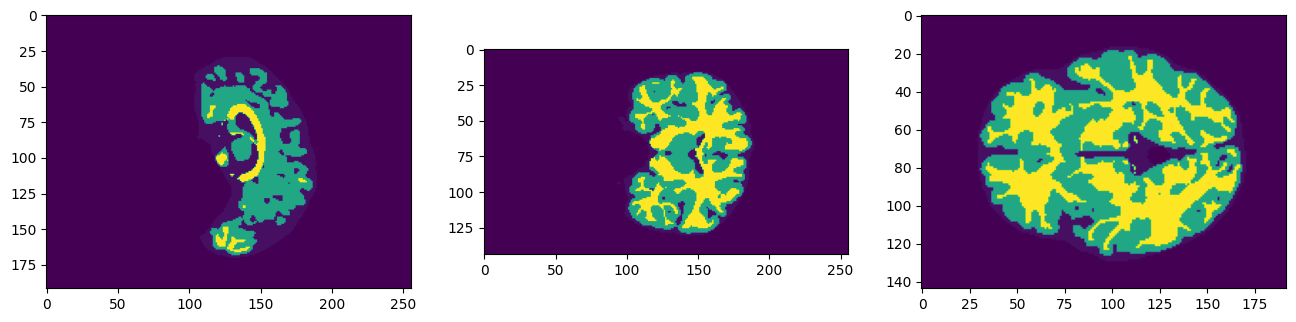

NOUVEAU PATIENT : subject-5-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-5-label.img
Image shape: (144, 192, 256, 1)


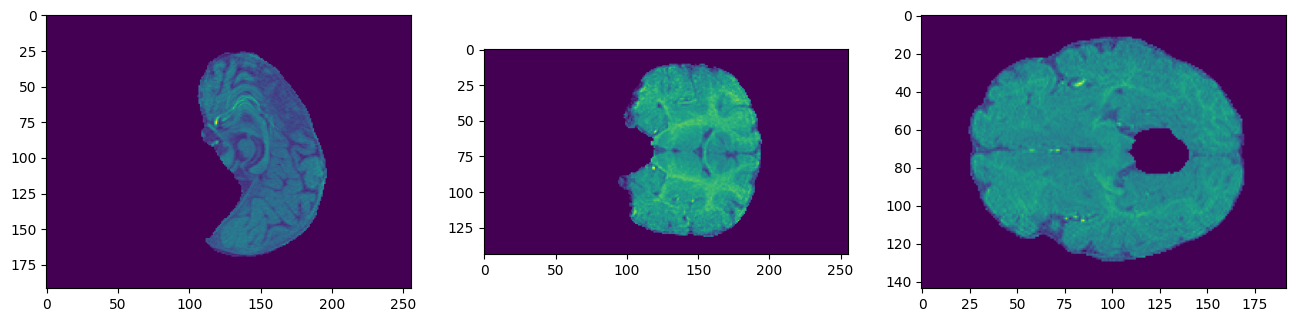

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-5-label.img
Image shape: (144, 192, 256, 1)


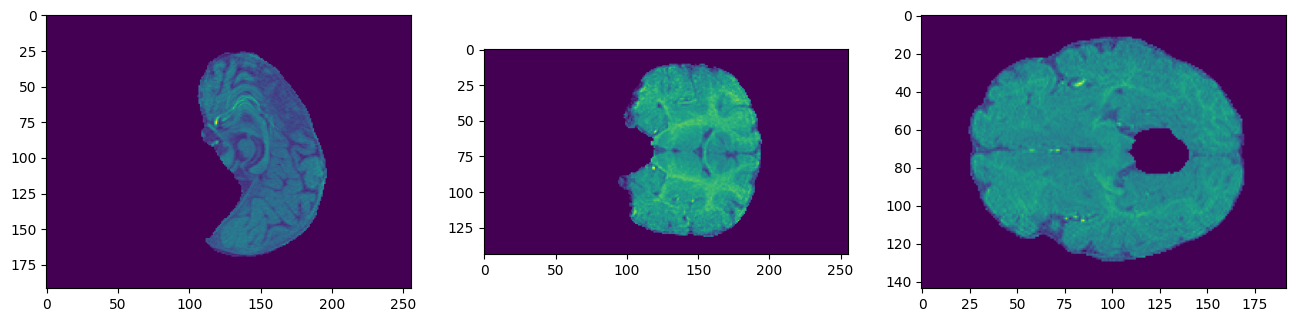

LABELS : Coupes sagittale (x), coronale (y), axiale (z) de subject-5-label.img
Image shape: (144, 192, 256, 1)


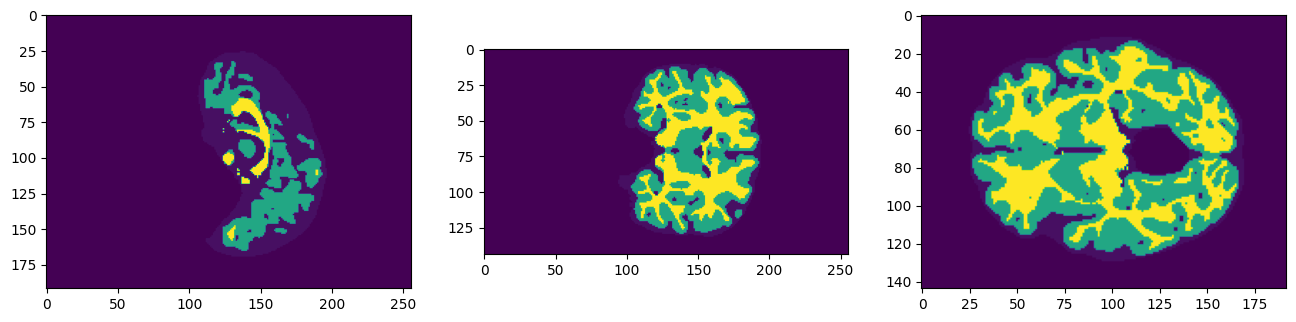

NOUVEAU PATIENT : subject-8-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-8-label.img
Image shape: (144, 192, 256, 1)


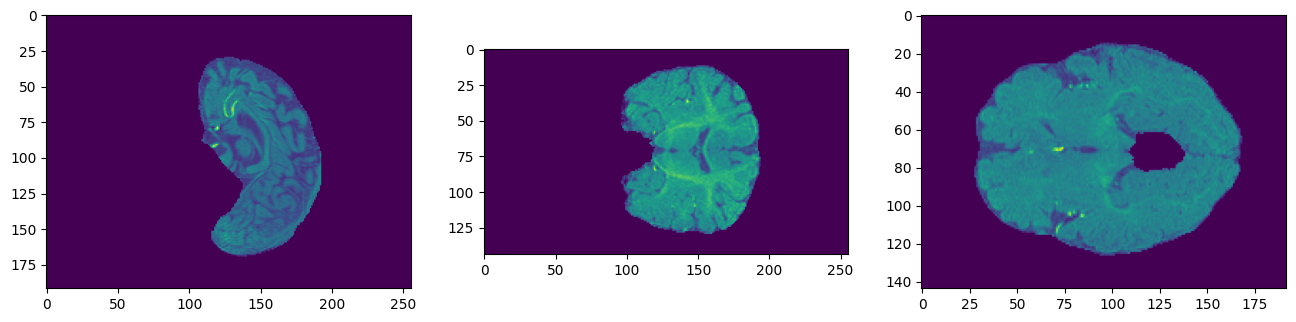

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-8-label.img
Image shape: (144, 192, 256, 1)


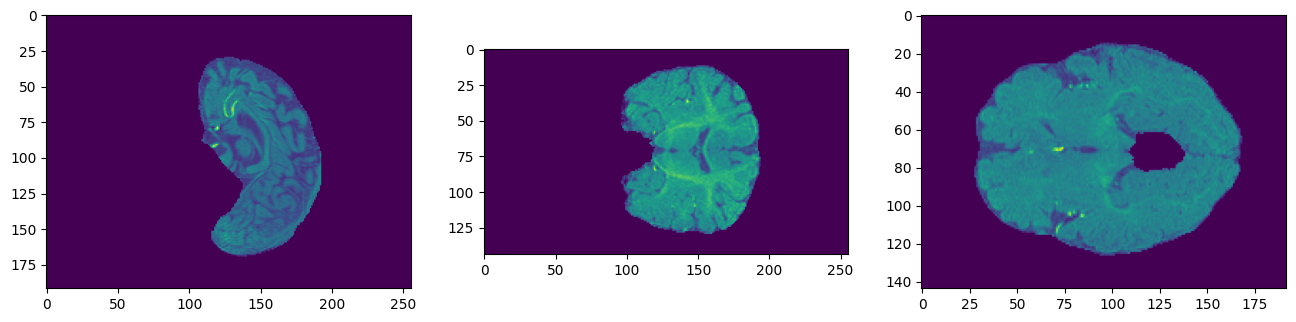

LABELS : Coupes sagittale (x), coronale (y), axiale (z) de subject-8-label.img
Image shape: (144, 192, 256, 1)


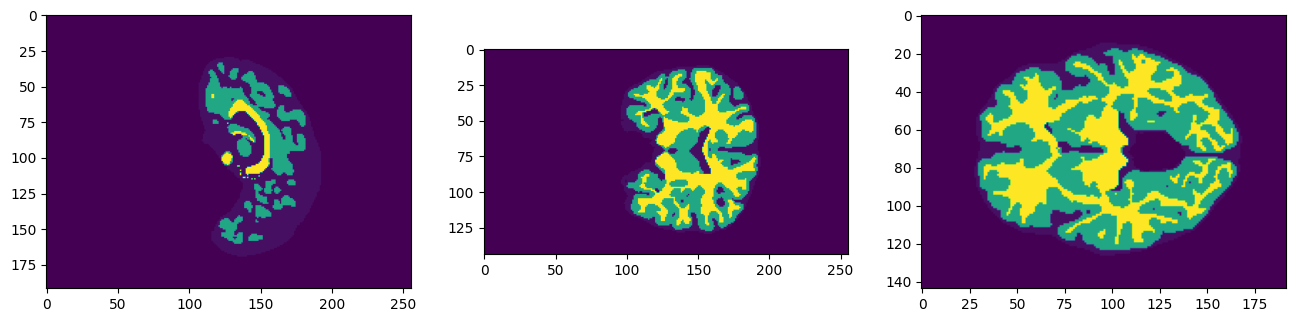

NOUVEAU PATIENT : subject-3-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-3-label.img
Image shape: (144, 192, 256, 1)


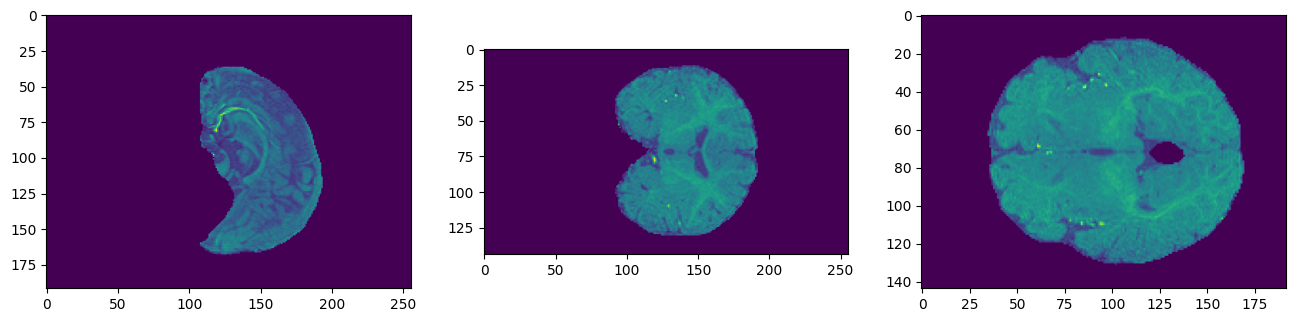

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-3-label.img
Image shape: (144, 192, 256, 1)


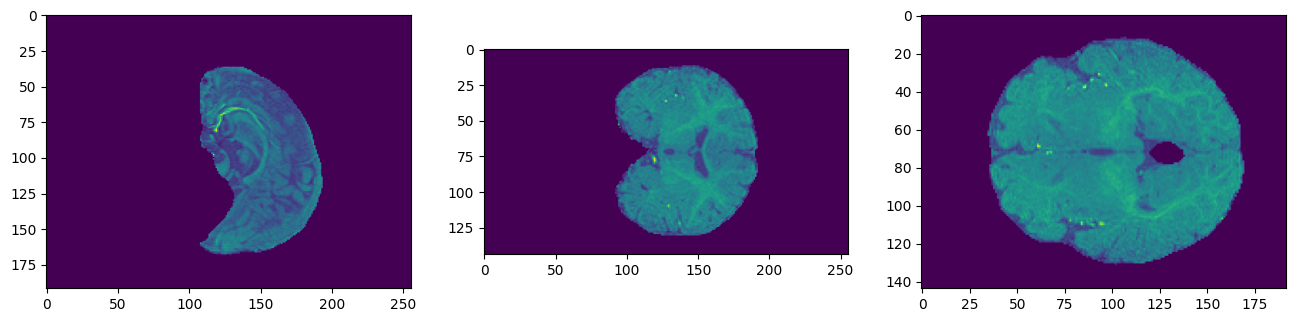

LABELS : Coupes sagittale (x), coronale (y), axiale (z) de subject-3-label.img
Image shape: (144, 192, 256, 1)


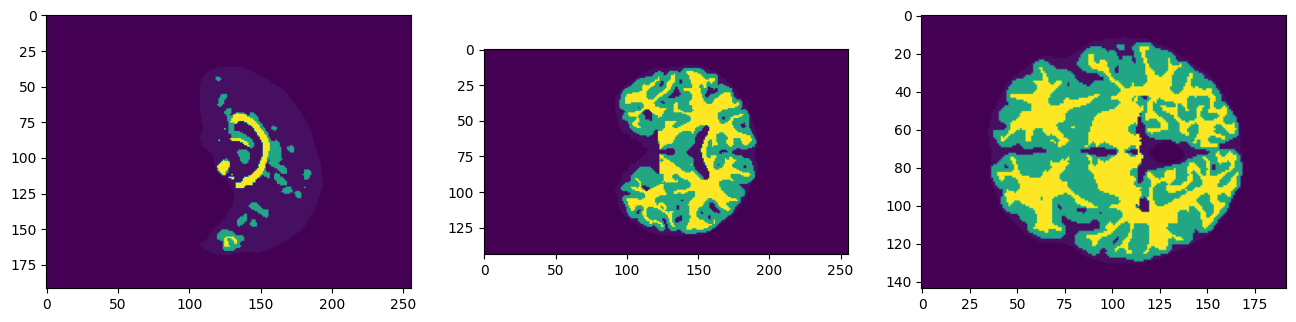

In [4]:
data = '../data'
# Change le répertoire de travail vers le dossier des données
os.chdir(data)

nb_patient_tot = 0
# Parcours récursif de tous les fichiers et dossiers dans le dossier des données
for dirname, _, filenames in os.walk(data):
    for filename in filenames:
        # Vérifie si le fichier est un fichier label et non un fichier hdr
        if "label" in filename and "hdr" not in filename:
            print("NOUVEAU PATIENT : " + filename)
            
            name_T1 = filename[:-10]+"-T1.img"
            T1 = nib.load(name_T1).get_fdata()
            
            if nb_patient_tot == 0:
                print("T1 : Coupes sagittale (x), coronale (y), axiale (z) de " + filename)
                print_image_3D(T1)
                
            name_T2 = filename[:-10]+"-T2.img"
            T2 = nib.load(name_T1).get_fdata()
            
            if nb_patient_tot == 0:
                print("T2 : Coupes sagittale (x), coronale (y), axiale (z) de " + filename)
                print_image_3D(T2)
                
            labels = nib.load(filename).get_fdata()
            
            if nb_patient_tot == 0:
                print("LABELS : Coupes sagittale (x), coronale (y), axiale (z) de " + filename)
                print_image_3D(labels)

T1 et T2 sont deux types d’images obtenues par résonance magnétique (IRM) du même individu. Chacune de ces images met en lumière différentes caractéristiques anatomiques du cerveau. T1 est particulièrement efficace pour visualiser les détails des tissus mous, offrant une vue nette des structures. En revanche, T2 est spécialement conçu pour mettre en évidence les zones contenant des fluides, tels que le liquide céphalo-rachidien et d’autres fluides. Une observation clé est que les régions qui apparaissent très lumineuses sur T1 tendent à apparaître sombres sur T2, et vice versa. Par exemple, les zones lumineuses centrales sur une image T2 correspondent souvent à la présence de liquide céphalo-rachidien, indiquant ainsi des conditions anatomiques importantes.

## STEP 2 :  Normalisation des données

Nous allons définir une fonction de normalisation, ici ça sera une normalisation Gaussienne qui veut dire qu'on a entre guillemé un ensemble de patients qui sont forcément différents, donc nos données ne sont pas homogènes car les machines IRM sont forcément différents, différent mode de calcule et pleins d'autre facteur que je ne vais pas cité ici. Donc le fait d'écrire une fonction normalisation est essentiel que ce soit pour notre réseau pour bien lui préparer pour l'apprentissage ou autre.

In [5]:
def normalize_data(data):
    # Crée un masque des valeurs positives dans les données
    positive_values_mask = data > 0
    # Calcule la moyenne et l'écart type des valeurs positives
    mu = np.mean(data[positive_values_mask])
    sigma = np.std(data[positive_values_mask])
    # Copie les données pour éviter de modifier les originaux
    normalized_data = np.copy(data)
    # Normalise les données en utilisant la formule (x - mu) / sigma pour les valeurs positives
    normalized_data[positive_values_mask] = (data[positive_values_mask] - mu) / (sigma)
    return normalized_data

### Séparation des données

Un phénomène très important en intelligence artificielle est la séparation des données. Je vais avoir un nombre de patients pré-définie, dans notre cas il y aura une liste [0, 6[ patients dans **training_patients**, de même pour une liste de validation **validation_patients** qui sera [6, 8[ et le reste dans notre liste **test_patients**. Je vais donc me servir pour l'apprentissage du training et du validation ou j'aurai environ [0, 6[ patients qui seraient au réseau à apprendre et [6, 8[ patients qui vont servir aux réseaux pour qu'ils se disent si il a bien appris ou non. Dans le cas ou les résultats sont faibles c-à-d qu'il a mal appris, On lui fera recommencer jusqu'à ce qu'il aura de bons résultats mais il faudra pas que ça soit du par coeur car les données de training et de validation sont séparés. On a enfin les données test, qui seront donné à notre réseau à la fin de l'apprentissage pour voir s'il a bien appris. C'est donc avec ces données test qu'on pourra avoir une conclusion de si notre réseau à bien effectuer correctement l'apprentissage. Ça va donc nous donner le calcule de la Dice final.

Nous allons écrire une fonction **sort_data** qui va charger et organiser les données.

Affichage des données normalisé et ajouter les données dans les listes training, validation et test. Ici on normalise uniquement les modalités T1 et T2 car ce sont ces modalités là qu'on va donner à notre modèle c-à-d le réseau et pas la VT, la raison sera expliquer en dessous.

Index 0: Processing file subject-1-label.img
NOUVEAU PATIENT : subject-1-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-1-label.img
Image shape: (144, 192, 256, 1)


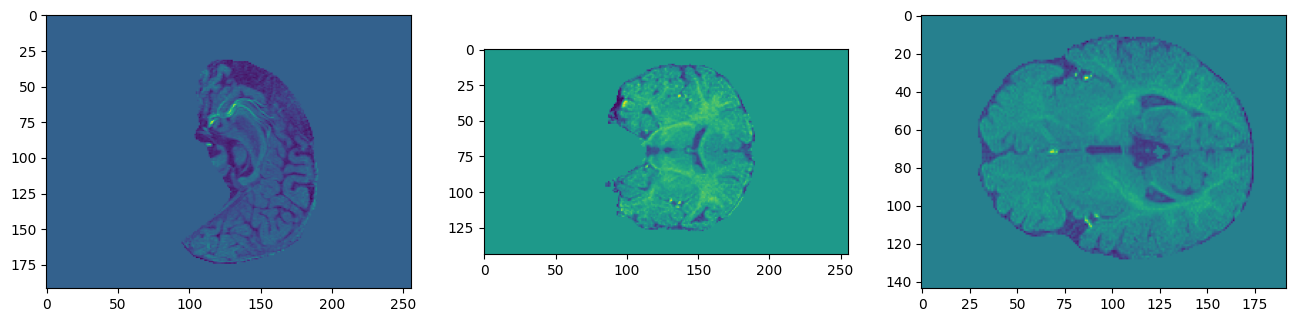

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-1-label.img
Image shape: (144, 192, 256, 1)


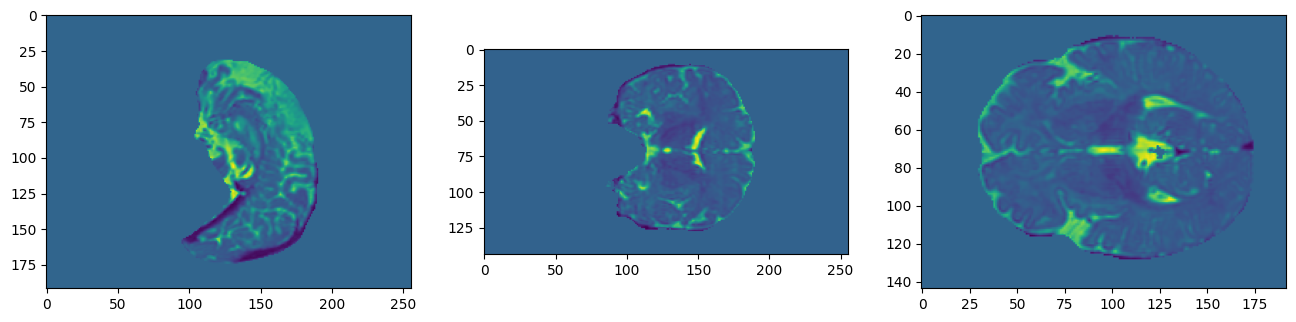

Index 1: Processing file subject-2-label.img
NOUVEAU PATIENT : subject-2-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-2-label.img
Image shape: (144, 192, 256, 1)


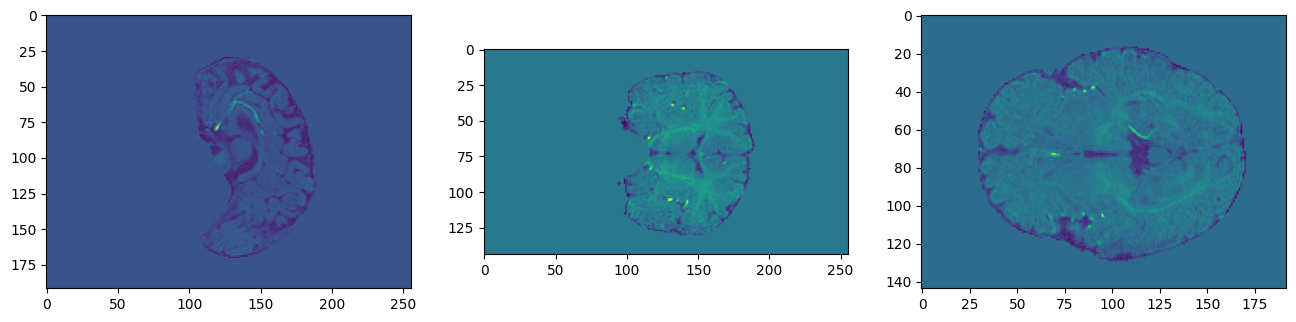

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-2-label.img
Image shape: (144, 192, 256, 1)


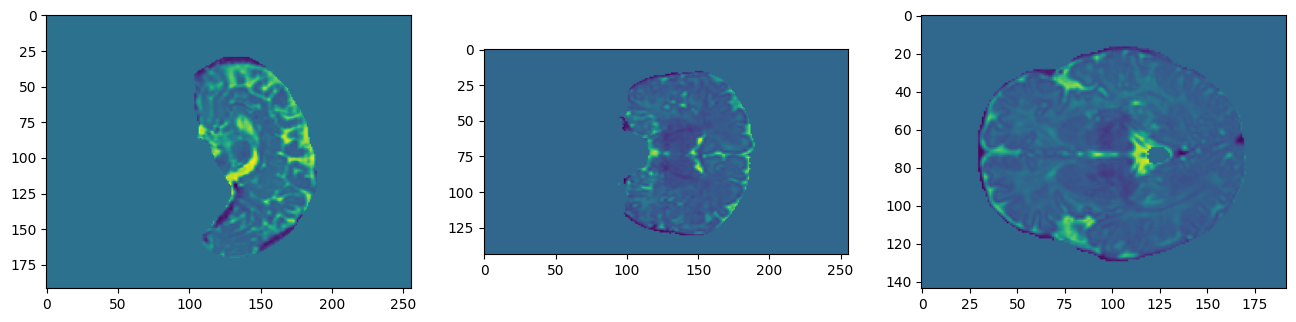

Index 2: Processing file subject-3-label.img
NOUVEAU PATIENT : subject-3-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-3-label.img
Image shape: (144, 192, 256, 1)


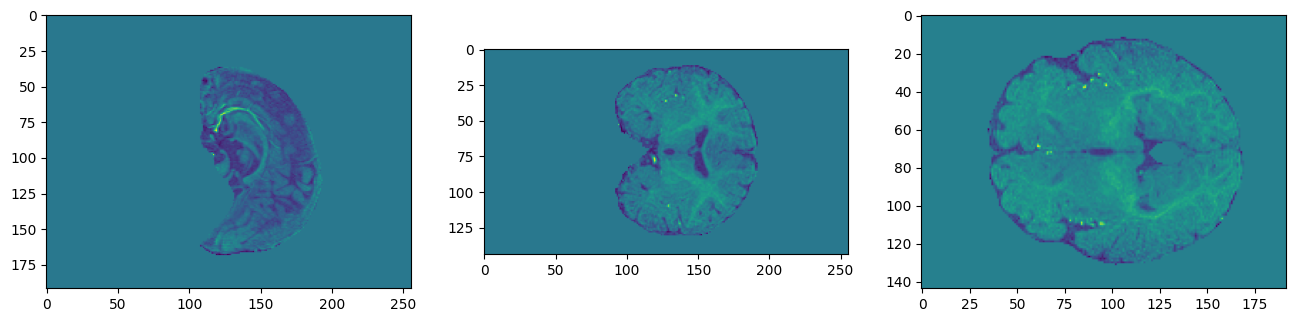

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-3-label.img
Image shape: (144, 192, 256, 1)


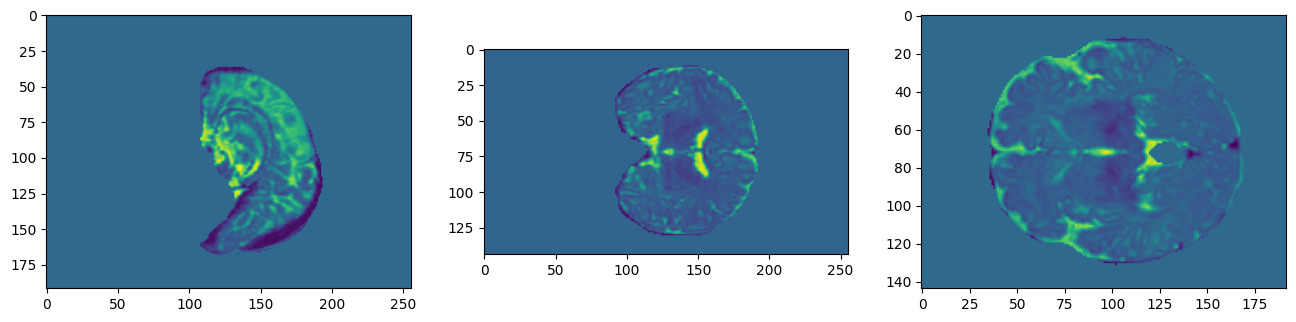

Index 3: Processing file subject-4-label.img
NOUVEAU PATIENT : subject-4-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-4-label.img
Image shape: (144, 192, 256, 1)


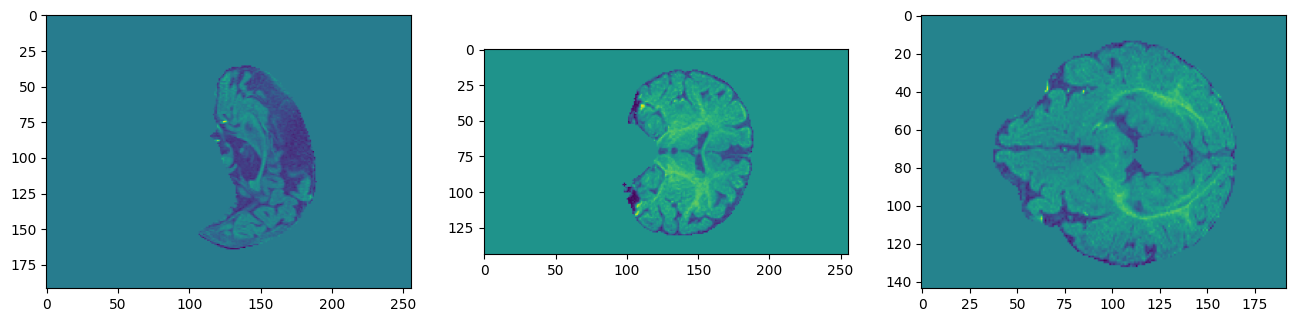

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-4-label.img
Image shape: (144, 192, 256, 1)


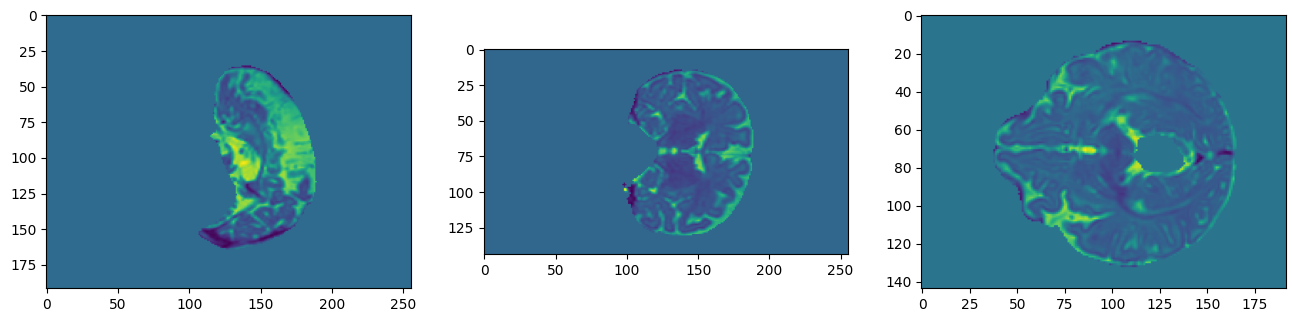

Index 4: Processing file subject-5-label.img
NOUVEAU PATIENT : subject-5-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-5-label.img
Image shape: (144, 192, 256, 1)


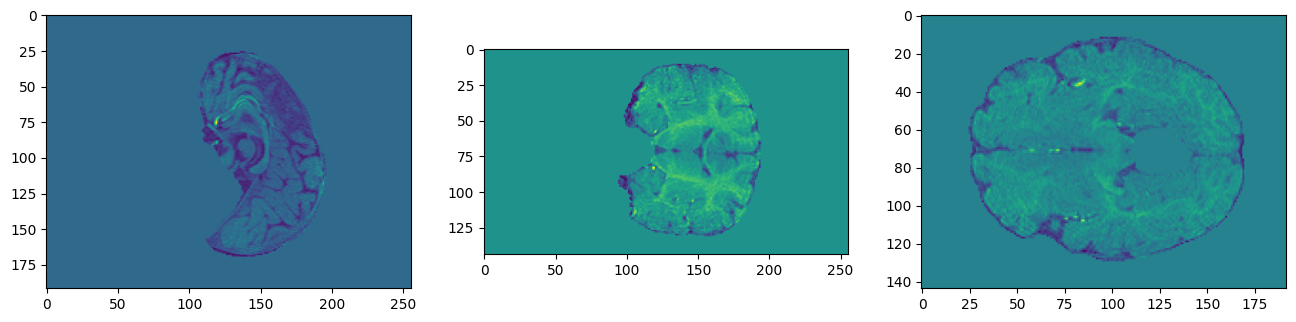

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-5-label.img
Image shape: (144, 192, 256, 1)


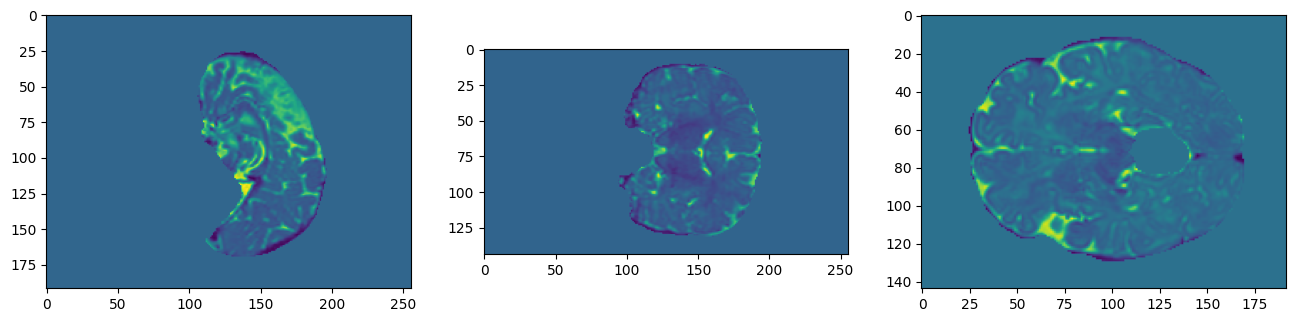

Index 5: Processing file subject-6-label.img
NOUVEAU PATIENT : subject-6-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-6-label.img
Image shape: (144, 192, 256, 1)


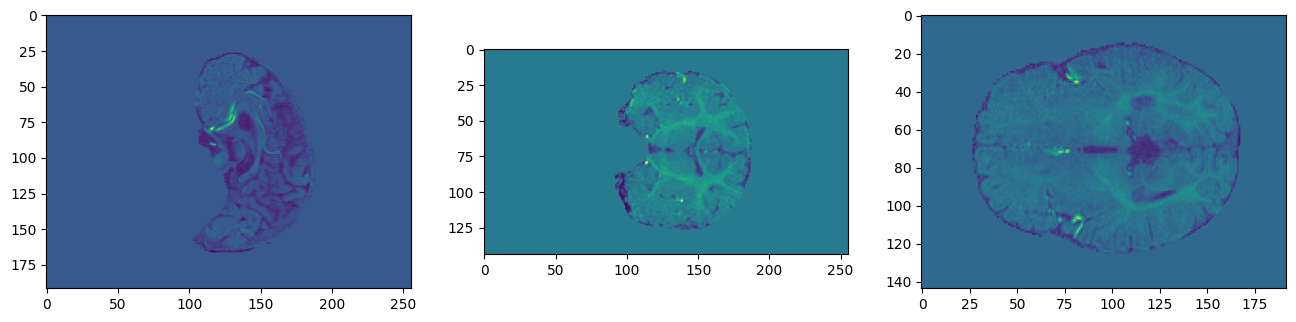

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-6-label.img
Image shape: (144, 192, 256, 1)


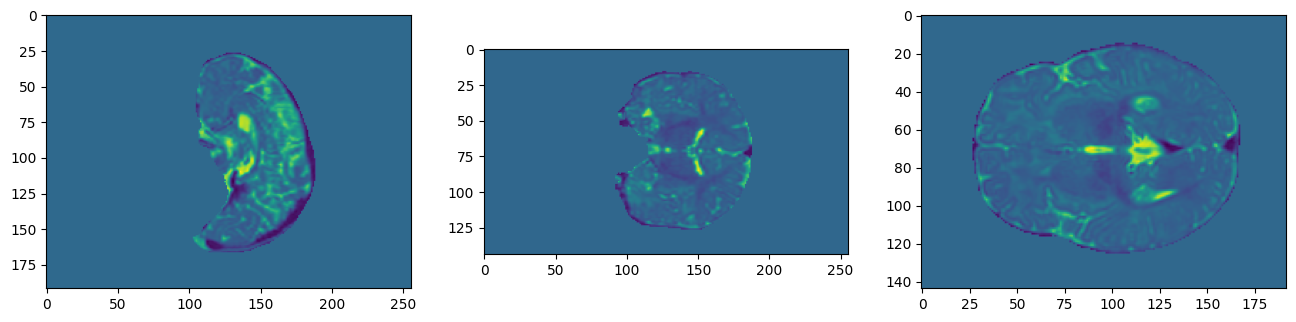

Index 6: Processing file subject-7-label.img
NOUVEAU PATIENT : subject-7-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-7-label.img
Image shape: (144, 192, 256, 1)


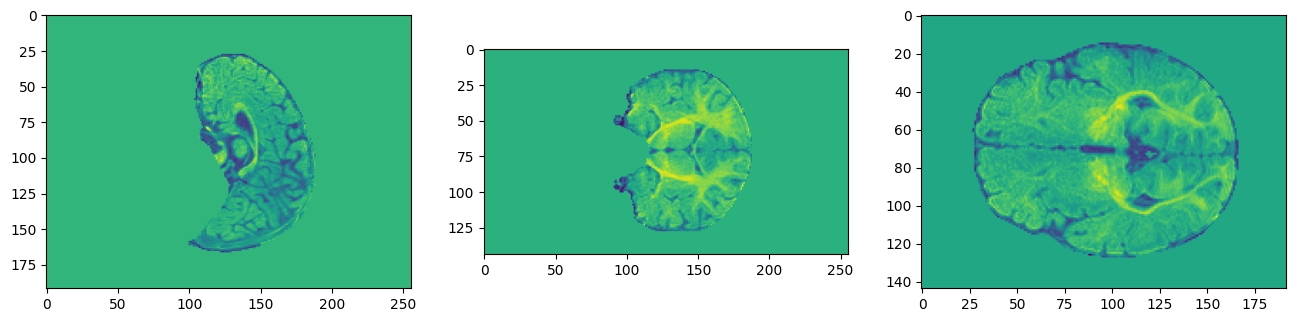

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-7-label.img
Image shape: (144, 192, 256, 1)


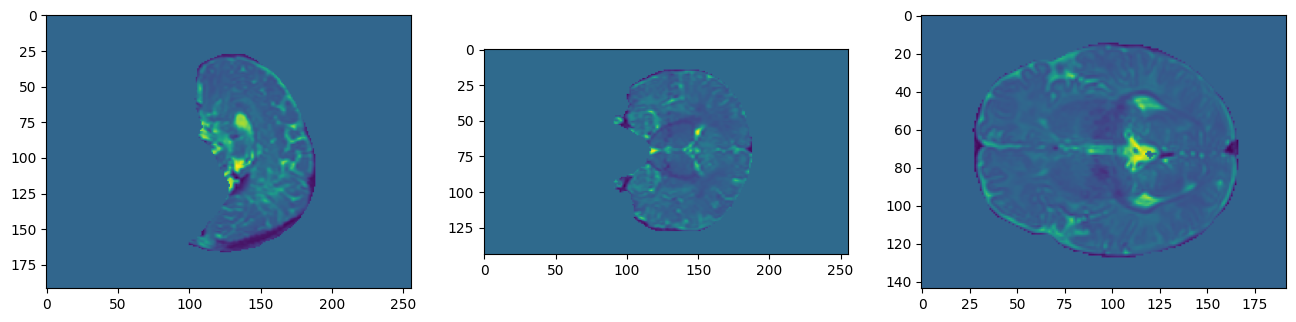

Index 7: Processing file subject-8-label.img
NOUVEAU PATIENT : subject-8-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-8-label.img
Image shape: (144, 192, 256, 1)


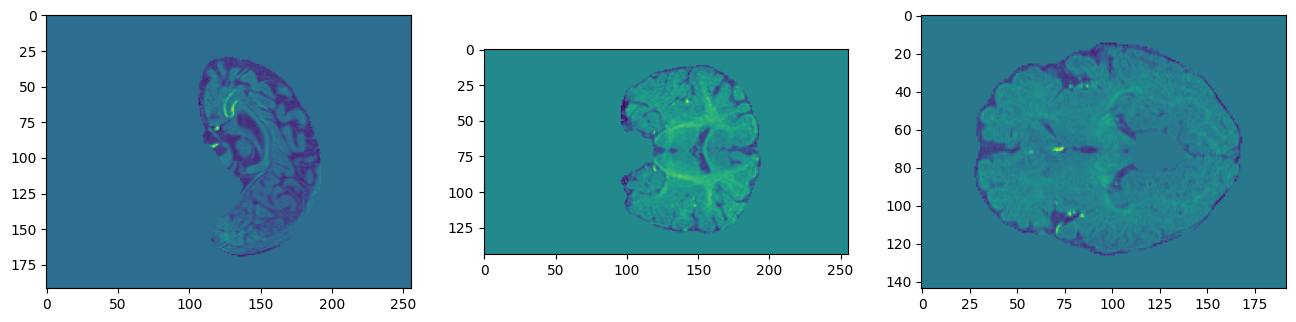

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-8-label.img
Image shape: (144, 192, 256, 1)


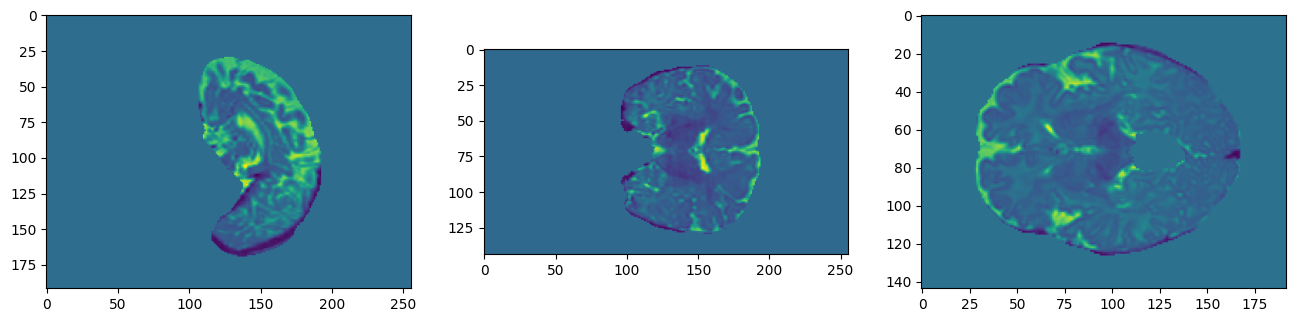

Index 8: Processing file subject-9-label.img
NOUVEAU PATIENT : subject-9-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-9-label.img
Image shape: (144, 192, 256, 1)


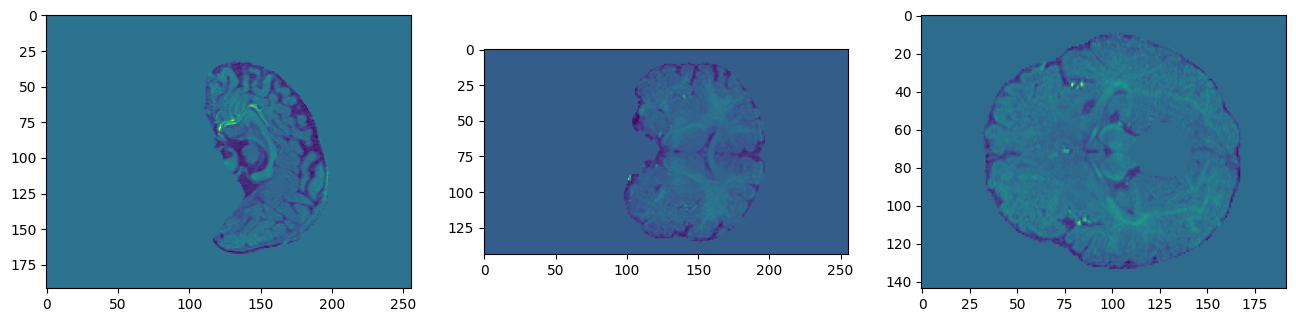

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-9-label.img
Image shape: (144, 192, 256, 1)


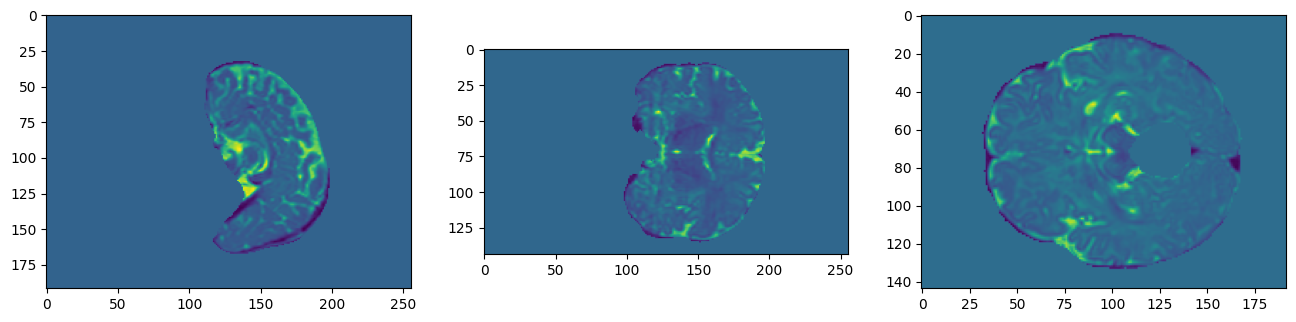

Index 9: Processing file subject-10-label.img
NOUVEAU PATIENT : subject-10-label.img
T1 : Coupes sagittale (x), coronale (y), axiale (z) de subject-10-label.img
Image shape: (144, 192, 256, 1)


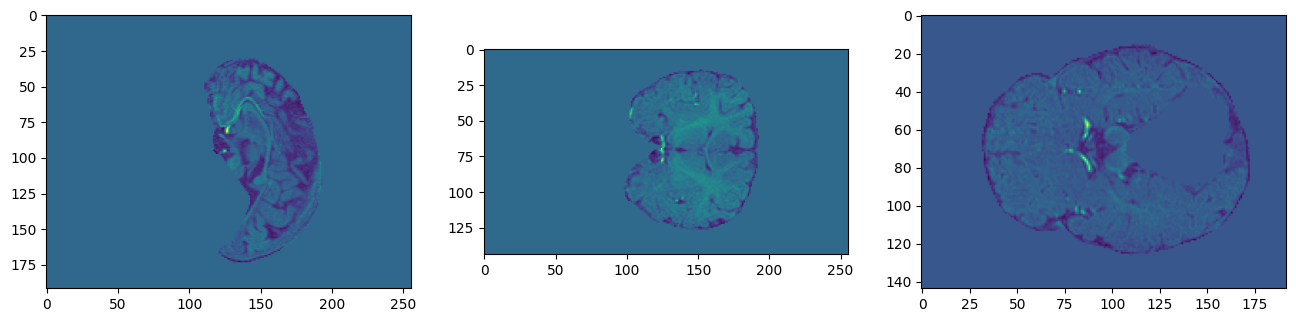

T2 : Coupes sagittale (x), coronale (y), axiale (z) de subject-10-label.img
Image shape: (144, 192, 256, 1)


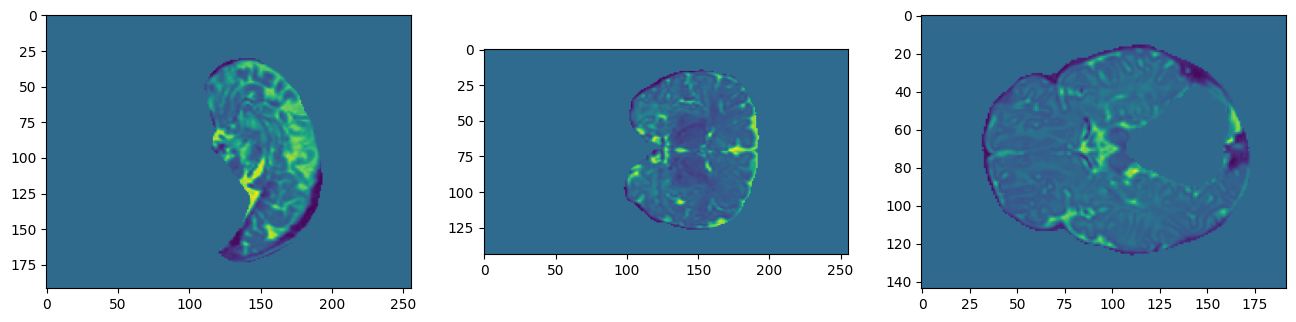

In [6]:
training_patients = []
validation_patients = []
test_patients = []

data_dir = '../data'
os.chdir(data_dir)


def sort_datas(files):
    # Parcours des fichiers
    for i in range(len(files)):
        data_name = files[i]
        # Vérification si le fichier est un fichier de label et n'est pas un fichier .hdr
        if "label" in data_name and "hdr" not in data_name:
            print(f"Index {i}: Processing file {data_name}")
            print("NOUVEAU PATIENT : " + data_name)
            
            # Chargement et normalisation de T1
            name_T1 = data_name[:-10] + "-T1.img"
            T1 = nib.load(name_T1).get_fdata()
            T1_normalized = normalize_data(T1)
            
            # Chargement et normalisation de T2
            name_T2 = data_name[:-10] + "-T2.img"
            T2 = nib.load(name_T2).get_fdata()
            T2_normalized = normalize_data(T2)
            
            # Assignation aux ensembles d'entraînement, de validation ou de test en fonction de l'index
            if i < 6 :
                print("T1 : Coupes sagittale (x), coronale (y), axiale (z) de " + data_name)
                print_image_3D(T1_normalized)
                training_patients.append(T1_normalized)
                
                print("T2 : Coupes sagittale (x), coronale (y), axiale (z) de " + data_name)
                print_image_3D(T2_normalized)
                training_patients.append(T2_normalized)
                
            elif i < 8:
                print("T1 : Coupes sagittale (x), coronale (y), axiale (z) de " + data_name)
                print_image_3D(T1_normalized)
                validation_patients.append(T1_normalized)
                
                print("T2 : Coupes sagittale (x), coronale (y), axiale (z) de " + data_name)
                print_image_3D(T2_normalized)
                validation_patients.append(T2_normalized)
                
            else:
                print("T1 : Coupes sagittale (x), coronale (y), axiale (z) de " + data_name)
                print_image_3D(T1_normalized)
                test_patients.append(T1_normalized)
                
                print("T2 : Coupes sagittale (x), coronale (y), axiale (z) de " + data_name)
                print_image_3D(T2_normalized)
                test_patients.append(T2_normalized)
                
files_list = ["subject-1-label.img", "subject-2-label.img", "subject-3-label.img", "subject-4-label.img", "subject-5-label.img", "subject-6-label.img","subject-7-label.img", "subject-8-label.img", "subject-9-label.img", "subject-10-label.img"]
sort_datas(files_list)

Normalement, l’affichage de matplotlib normalise l’affichage et donc on ne devra voir quasi aucune différence avec le Step 1 (sans normalisation).

Nous ne normalisons pas la VT (vérité terrain) car elle sert de référence pour les modèles afin d’atteindre les résultats souhaités, et elle ne sera pas utilisée comme données d’entrée pour nos modèles. De plus, les valeurs ont été déterminées manuellement par des médecins et correspondent à des normes déjà établies et normalisées.

## Step 3 : Formatage des données en mode 2D

On est dans un cas ou on a uniquement 10 patients avec des données 3D, ce qui est très peu pour un réseau neuronnes et surtout pour du deep learning. Ce que nous allons faire ça sera de découper les cerveaux de chacun de nos patients qui étaient en 3D en données 2D, ça va donc faire des slices ou peu aussi appeler ça des coupes. En effectuer ça, nous allons augmenter le nombre de données que l'on entre à l'intérieur de nos réseaux.

On va maintenant stocker les données d'entraînements et de validation dans des tableaux pour l'apprentissage.

Nous allons donc commencer par écrire une fonction **processe_img** qui va charger une image 3D.

In [7]:
def processe_img(file_path):
    # Verification
    #if not os.path.isfile('../data/' + file_path + '.img'):
    #    raise FileNotFoundError(f"Image file '{file_path}.img' not found.")
    
    img = nib.load('../data/' + file_path + '.img')
    data = img.get_fdata()
    return data

Cette fonction **processe_img_pat** est conçue pour charger et extraire les données des images T1, T2 et du label à partir du dossier data, puis retourner ces données dans un format dict().

In [8]:
def processe_img_pat(id, data_dir='../data/'):
    if not os.path.exists(data_dir):
        raise FileNotFoundError(f"Data directory '{data_dir}' not found.")

    # Chemins vers les fichiers d'images
    T1_file = os.path.join(data_dir, f"{id}-T1.img")
    T2_file = os.path.join(data_dir, f"{id}-T2.img")
    LABEL_file = os.path.join(data_dir, f"{id}-label.img")

    # Vérifier l'existence des fichiers d'images
    if not os.path.isfile(T1_file):
        raise FileNotFoundError(f"T1 image file '{T1_file}' not found.")
    if not os.path.isfile(T2_file):
        raise FileNotFoundError(f"T2 image file '{T2_file}' not found.")
    if not os.path.isfile(LABEL_file):
        raise FileNotFoundError(f"Label image file '{LABEL_file}' not found.")

    # Charger les données des images T1, T2 et label
    try:
        T1 = nib.load(T1_file)
        T1_TRAIN = T1.get_fdata()

        T2 = nib.load(T2_file)
        T2_TRAIN = T2.get_fdata()

        LABEL = nib.load(LABEL_file)
        label_train = LABEL.get_fdata()

    except Exception as e:
        raise RuntimeError(f"Failed to load images: {str(e)}")

    return {
        'T1': T1_TRAIN,
        'T2': T2_TRAIN,
        'LABEL': label_train
    }

La fonction **nb_img_3D_to_slices_pertinents** est utile pour analyser et compter les coupes pertinentes dans un ensemble de fichiers d’images 3D, dans notre cas les fichiers sont stocké dans le dossier data, en se basant sur un critère spécifique de contenu de matière cérébrale dans chaque coupe. Dans la fonction nous allons parcourir toutes les coupes en Z de tous les patients d’entrainement et on voit combien ont une aire np.sum(np.where(V T > 0, 1, 0)) > 100. De plus on initialise notre nombre NBCOUPES de coupes 2D pertinentes, SX et SY pour les dimensions X et Y de la dernière coupe analysée dans le dernier fichier de la liste files.

In [9]:
def nb_img_3D_to_slices_pertinents(filenames):
    # nombre NBCOUPES de coupes 2D pertinentes
    NBCOUPES = 0
    last_array = None

    for filename in filenames:
        array = processe_img(filename)
        for i in range(array.shape[2]):
            slice_2d = array[:, :, i]
            # La condition nous permet de savoir si la coupe contient un nombre suffisant de matière
            # cérébrale ou non
            if np.sum(np.where(slice_2d > 0, 1, 0)) >= 100:
                # Incrémenter le compteur de coupes pertinentes
                NBCOUPES += 1

        # Mettre à jour l'array pour conserver le dernier traité
        last_array = array

    if last_array is not None:
        return {
            "NBCOUPES": NBCOUPES,
            # Dimension x de la dernière coupe traitée
            "SX": last_array.shape[0],
            # Dimension y de la dernière coupe traitée
            "SY": last_array.shape[1]
        }
    else:
        return {
            "NBCOUPES": NBCOUPES,
            "SX": 0,
            "SY": 0
        }

In [10]:
nb_img_3D_to_slices_pertinents([f'subject-{i}-label' for i in range(1, 11)])

{'NBCOUPES': 994, 'SX': 144, 'SY': 192}

Nous allons maintenant traiter les données. Nous allons crées des tableaux X_TRAIN, Y_TRAIN pour la parti training puis X_VALIDATION, Y_VALIDATION pour la parti validation. Les cerveaux des patients sont d'entraînement donc stocké dans X_TRAIN et X_VALIDATION. Or Y_TRAIN et Y_VALIDATION ce sont les données des vérité terrains qui corresponde.

On initialise d'abord X_TRAIN_0, X_VALIDATION_0, Y_TRAIN_0 et X_VALIDATION_0 pour faire quelques teste dessus, puis on passera directement sur les vraies données.

In [11]:
# Définition des listes de labels et de patients pour l'entraînement
LABEL_TRAINING_0 = [f'subject-{i}-label' for i in range(1, 7)]
PATIENTS_TRAINING_0 = [f'subject-{i}' for i in range(1, 7)]

In [12]:
# Définition des listes de labels et de patients pour la validation
LABEL_VALIDATION_0 = [f'subject-{i}-label' for i in range(7, 9)]
PATIENTS_VALIDATION_0 = [f'subject-{i}' for i in range(7, 9)]

In [13]:
# Obtenir les informations sur les coupes pertinentes et les dimensions SX, SY pour l'entraînement
INFO_TRAIN = nb_img_3D_to_slices_pertinents(LABEL_TRAINING_0)

# Initialiser les tableaux X et Y pour stocker les données normalisées pour l'entraînement
X_TRAIN_0 = np.zeros((INFO_TRAIN["NBCOUPES"], INFO_TRAIN["SX"], INFO_TRAIN["SY"], 2))
Y_TRAIN_0 = np.zeros((INFO_TRAIN["NBCOUPES"], INFO_TRAIN["SX"], INFO_TRAIN["SY"]))

NUMCOUPETrain = 0  # Compteur de coupes pertinentes pour l'entraînement

# Parcourir chaque patient dans la liste patientsTrain
for patient_id in PATIENTS_TRAINING_0:
    images = processe_img_pat(patient_id)

    T1 = images['T1']
    T2 = images['T2']
    VT = images['LABEL']

    # Normaliser les images T1 et T2 pour le patient courant
    T1_norm = (T1 - np.mean(T1[T1 > 0])) / np.std(T1[T1 > 0])
    T2_norm = (T2 - np.mean(T2[T2 > 0])) / np.std(T2[T2 > 0])

    # Parcourir chaque coupe en z dans l'image VT (label) pour l'entraînement
    for z in range(VT.shape[2]):
        if np.sum(np.where(VT[:, :, z] > 0, 1, 0)) > 100:
            if NUMCOUPETrain >= X_TRAIN_0.shape[0]:
                X_TRAIN_0 = np.append(X_TRAIN_0, np.zeros((1, INFO_TRAIN["SX"], INFO_TRAIN["SY"], 2)), axis=0)
                Y_TRAIN_0 = np.append(Y_TRAIN_0, np.zeros((1, INFO_TRAIN["SX"], INFO_TRAIN["SY"])), axis=0)

            X_TRAIN_0[NUMCOUPETrain, :, :, 0] = T1_norm[:, :, z].squeeze()
            X_TRAIN_0[NUMCOUPETrain, :, :, 1] = T2_norm[:, :, z].squeeze()
            Y_TRAIN_0[NUMCOUPETrain, :, :] = np.where(VT[:, :, z] > 0, 1, 0).squeeze()
            NUMCOUPETrain += 1

print("X_TRAIN_0 : ", X_TRAIN_0)
print("Y_TRAIN_0 : ", Y_TRAIN_0)

# Obtenir les informations sur les coupes pertinentes et les dimensions SX, SY pour la validation
INFO_VAL = nb_img_3D_to_slices_pertinents(LABEL_VALIDATION_0)

# Initialiser les tableaux X et Y pour stocker les données normalisées pour la validation
X_VALIDATION_0 = np.zeros((INFO_VAL["NBCOUPES"], INFO_VAL["SX"], INFO_VAL["SY"], 2))
Y_VALIDATION_0 = np.zeros((INFO_VAL["NBCOUPES"], INFO_VAL["SX"], INFO_VAL["SY"]))

NUMCOUPE_VAL = 0  # Compteur de coupes pertinentes pour la validation

# Parcourir chaque patient dans la liste patientsVal pour la validation
for patient_id in PATIENTS_VALIDATION_0:
    images = processe_img_pat(patient_id)

    T1 = images['T1']
    T2 = images['T2']
    VT = images['LABEL']

    # Normaliser les images T1 et T2 pour le patient courant
    T1_norm = (T1 - np.mean(T1[T1 > 0])) / np.std(T1[T1 > 0])
    T2_norm = (T2 - np.mean(T2[T2 > 0])) / np.std(T2[T2 > 0])

    # Parcourir chaque coupe en z dans l'image VT (label) pour la validation
    for z in range(VT.shape[2]):
        if np.sum(np.where(VT[:, :, z] > 0, 1, 0)) > 100:
            if NUMCOUPE_VAL >= X_VALIDATION_0.shape[0]:
                X_VALIDATION_0 = np.append(X_VALIDATION_0, np.zeros((1, INFO_VAL["SX"], INFO_VAL["SY"], 2)), axis=0)
                Y_VALIDATION_0 = np.append(Y_VALIDATION_0, np.zeros((1, INFO_VAL["SX"], INFO_VAL["SY"])), axis=0)

            X_VALIDATION_0[NUMCOUPE_VAL, :, :, 0] = T1_norm[:, :, z].squeeze()
            X_VALIDATION_0[NUMCOUPE_VAL, :, :, 1] = T2_norm[:, :, z].squeeze()
            Y_VALIDATION_0[NUMCOUPE_VAL, :, :] = np.where(VT[:, :, z] > 0, 1, 0).squeeze()
            NUMCOUPE_VAL += 1
            
print("X_VALIDATION_0 : ", X_VALIDATION_0)
print("Y_VALIDATION_0 : ", Y_VALIDATION_0)

X_TRAIN_0 :  [[[[-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   ...
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]]

  [[-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   ...
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]]

  [[-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   ...
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]]

  ...

  [[-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   ...
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]]

  [[-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   ...
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]]

  [[-4.66385432 -3.00189621]
   [-4.66385432 -3.00189621]
   [-4.

In [14]:
def processe_data(coupe_patients, coupe_labels):
    # Essaye d'obtenir des informations pertinentes à partir des étiquettes de coupes
    try:
        infos = nb_img_3D_to_slices_pertinents(coupe_labels)
    except ValueError as e:
        print(f"Erreur lors de l'obtention des informations : {e}")
        return None, None

    try:
        # Tableau X pour stocker les données d'image normalisées, avec 2 canaux (T1 et T2)
        # Nous allons mettre la cannaux à 2
        X = np.zeros((infos["NBCOUPES"], infos["SX"], infos["SY"], 2))
        # Tableau Y pour stocker les étiquettes binaires correspondantes
        Y = np.zeros((infos["NBCOUPES"], infos["SX"], infos["SY"]))
    except KeyError as e:
        print(f"Clé manquante dans les informations : {e}")
        return None, None
    except Exception as e:
        print(f"Erreur lors de la création des tableaux X et Y : {e}")
        return None, None

    # Initialisation du compteur de coupes
    NUMCOUPE = 0

    # Parcourt chaque patient dans la liste des patients
    for id_p in coupe_patients:
        try:
            # Traitement des images du patient
            patient_img_data = processe_img_pat(id_p)
        except ValueError as e:
            print(f"Erreur lors du traitement du patient {id_p} : {e}")
            continue

        try:
            # Récupère les images T1, T2 et les labels (VT) du patient
            T1, T2, VT = patient_img_data['T1'], patient_img_data['T2'], patient_img_data['LABEL']
        except KeyError as e:
            print(f"Clé manquante dans les données du patient {id_p} : {e}")
            continue

        # Normalise les données T1 et T2
        T1_NORM = normalize_data(T1)
        T2_NORM = normalize_data(T2)

        # Parcourt chaque coupe dans les données du label (VT)
        for value in range(VT.shape[2]):
            try:
                # Vérifie si la coupe contient suffisamment de pixels pertinents (> 0)
                if np.sum(np.where(VT[:, :, value] > 0, 1, 0)) > 100:
                    # Stocke les coupes normalisées de T1 et T2 dans X
                    X[NUMCOUPE, :, :, 0] = T1_NORM[:, :, value].squeeze()
                    X[NUMCOUPE, :, :, 1] = T2_NORM[:, :, value].squeeze()
                    # Stocke le masque binaire de la coupe dans Y
                    Y[NUMCOUPE, :, :] = np.where(VT[:, :, value] > 0, 1, 0).squeeze()
                    # Incrémente le compteur de coupes
                    NUMCOUPE += 1
            except IndexError as e:
                print(f"Erreur d'index lors du traitement de la coupe {value} du patient {id_p} : {e}")
                continue
            except Exception as e:
                print(f"Erreur inattendue lors du traitement de la coupe {value} du patient {id_p} : {e}")
                continue

    return X, Y

Nous allons continuer la suite du projet avec X_TRAIN_1, Y_TRAIN_1, X_VALIDATION_1 et Y_VALIDATION_1 pour l'apprentissage de notre modèle réseau neuronne.

In [15]:
LABEL_TRAINING_1 = [f'subject-{i}-label' for i in range(1, 7)]
PATIENTS_TRAINING_1 = [f'subject-{i}' for i in range(1, 7)]

LABEL_VALIDATION_1 = [f'subject-{i}-label' for i in range(7, 9)]
PATIENTS_VALIDATION_1 = [f'subject-{i}' for i in range(7, 9)]

X_TRAIN_1, Y_TRAIN_1 = processe_data(PATIENTS_TRAINING_1, LABEL_TRAINING_1)
X_VALIDATION_1, Y_VALIDATION_1= processe_data(PATIENTS_VALIDATION_1, LABEL_VALIDATION_1)

print(X_TRAIN_1)
print(Y_TRAIN_1)
print(X_VALIDATION_1)
print(Y_VALIDATION_1)

[[[[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  ...

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  ...

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]
   ...
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 

Nous avons donc terminé de séparer, couper les données. On a maintenant un très grand nombres de données le fais qu'on a coupé en image 2D pour que notre modèle de réseau neuronnes puisse passer à l'apprentissage.

## Step 4 : un premier entraînement de réseau 

Nous allons commencer par la première parti de notre modèle réseau neuronne, la segmentation. On définit d'abord un petit réseau à base de U-Net déjà pré-fait qu'on retrouve sur le lien suivant : **https://github.com/zhixuhao/unet/blob/master/model.py**.
De plus, ce réseau prendra uniquement en input une slice T1, une slice T2 et il devra alors effectuer les prédictions.
J'ai du faire quelques modifications sur le réseau neuronne pour qu'il fonctionne, notemment les paramètres.

In [16]:
import numpy as np
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras import backend as keras

nbf64 = 8
nbf128 = 2 * nbf64
nbf256 = 2 * nbf128
nbf512 = 2 * nbf256
nbf1024 = 2 * nbf512

def unet(pretrained_weights = None,input_size = (144, 192,2), lr=1e-4):
    inputs = Input(input_size)
    conv1 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(nbf1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(nbf1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(nbf512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(nbf256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(nbf128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(nbf64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    print(inputs)
    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)
    return model



Initialisation du model avec unet.

In [19]:
import tensorflow
model = unet()

<KerasTensor shape=(None, 144, 192, 2), dtype=float32, sparse=None, name=keras_tensor>


On configure une méthode de réduction du taux d’apprentissage (learning rate) pour un modèle d’apprentissage profond en utilisant un callback dans Keras. L’utilité d’utiliser EarlyStopping est d’arrêter l’entraînement du modèle automatiquement si la perte de validation (val_loss) ne s’améliore pas de façon significative (au moins 0.001) pendant 5 époques consécutives. Cela évite de gaspiller du temps et des ressources en continuant à entraîner un modèle qui ne s’améliore plus.

In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

L’utilité d’utiliser ReduceLROnPlateau est de réduire automatiquement le taux d’apprentissage (learning rate) du modèle si la perte de validation (val_loss) ne s’améliore pas pendant 5 époques consécutives. Cela aide à affiner l’entraînement du modèle et à obtenir de meilleures performances en diminuant la vitesse d’apprentissage, mais sans descendre en dessous de 0.000001.

In [21]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)

On arrive sur l'une des parties les plus importante du projet, la partie apprentissage de notre modèle réseau neuronne. C'est dans cette parti que nous allons utiliser la fonction fit(). On lui entre en input les données d'entraînement qu'on a prépare dans les steps precédente qui ont été on le rappel bien homogénéisé, bien traiter etc... Nous allons donc lui donner les données de validation pour qu'on vérifie justement si le modèle à bien appris à chaque epochs (dans notre cas, epochs = 20). Pour rappel l'epoch est considéré comme entre guillet un étape d'entraînement. Plus on a d'epochs, plus ça sera long. Dans mon cas j'ai mis epochs égale à 20 pour justement éviter que ça prenne plus de temps.

In [22]:
history = model.fit(x=X_TRAIN_1,
          y=Y_TRAIN_1,
          shuffle=True,
          validation_data=(X_VALIDATION_1, Y_VALIDATION_1),
          epochs=20,
          batch_size=1,
          callbacks=[reduce_lr, early_stopping],
          validation_freq=1)

Epoch 1/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.8290 - loss: 0.5255 - val_accuracy: 0.9889 - val_loss: 0.4301 - learning_rate: 1.0000e-04
Epoch 2/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.9914 - loss: 0.1854 - val_accuracy: 0.9950 - val_loss: 0.0152 - learning_rate: 1.0000e-04
Epoch 3/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.9952 - loss: 0.0137 - val_accuracy: 0.9963 - val_loss: 0.0106 - learning_rate: 1.0000e-04
Epoch 4/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.9964 - loss: 0.0094 - val_accuracy: 0.9968 - val_loss: 0.0119 - learning_rate: 1.0000e-04
Epoch 5/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9972 - loss: 0.0075 - val_accuracy: 0.9976 - val_loss: 0.0072 - learning_rate: 1.0000e-04
Epoch 6/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9977 - loss: 0.0061 - val_accuracy: 0.9980 - val_loss: 0.0056 - learning_rate: 1.0000e-04
Epoch 7/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/ste

La méthode qu'on va utiliser ci-dessous s'appelle evaluate de Keras qui est utilisée pour évaluer les performances d’un modèle de réseau de neurones sur un ensemble de données de validation ou de test, dans notre cas c'est les données de validation et entraînement

In [23]:
loss, accuracy = model.evaluate(X_VALIDATION_1, Y_VALIDATION_1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.9988 - loss: 0.0033
Validation Accuracy: 99.90%


In [24]:
loss1, accuracy1 = model.evaluate(X_TRAIN_1, Y_TRAIN_1)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9992 - loss: 0.0024
Validation Accuracy: 99.90%


Nous allons tracer deux graphe ci-dessous. Une Graphe de l'Accuracy (Précision) et une Graphe de la Loss (Perte) pour visualiser les résultats obtenue.

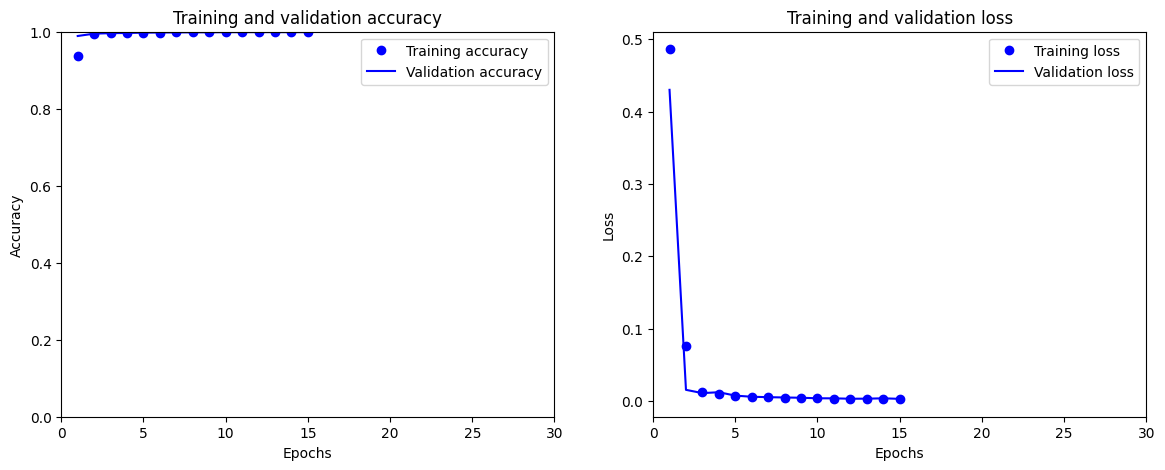

In [25]:
import matplotlib.pyplot as plt

def plot_performance(history):
    # Récupérer l'historique de l'entraînement
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    # Tracer la courbe de précision
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Limite de l'axe y de 0 à 1 pour accuracy
    plt.xlim(0, 30)  # Limite de l'axe x de 0 à 20 pour epochs
    plt.legend()
    
    # Tracer la courbe de perte
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim(0, 30)  # Limite de l'axe x de 0 à 20 pour epochs
    plt.legend()
    
    plt.show()
    
# Tracer les courbes de performance
plot_performance(history)

### Interprération des graphes

Pour le graphe "Training and validation accuracy"
- La précision d’entraînement atteint rapidement 1.0, indiquant que le modèle fait très peu d’erreurs sur les données d’entraînement.
- La précision de validation reste également très élevée et proche de 1.0, ce qui montre que le modèle généralise bien sur les nouvelles données.

Pour le graphe "Training and validation loss"
- La perte d’entraînement diminue rapidement et reste très faible après quelques époques, ce qui montre que le modèle apprend bien à partir des données d’entraînement.
- La perte de validation suit une tendance similaire, restant également très faible, ce qui indique que le modèle ne surapprend pas (pas de surapprentissage évident) et qu’il performe bien sur de nouvelles données.

On peut donc en conclure que les deux graphes montrent que le modèle est performant, avec une précision élevée et une perte faible aussi bien sur les données d’entraînement que de validation. Cela suggère que le modèle est bien entraîné et généralise bien.

## Step 5 : Finir la première étape de la cascade

Après qu'on est effectuer l'étape d'entraînement de notre modèle réseau neuronne, on remarque avec le graph que notre réseau a convergé. Nous allons donc désormais mesurer la qualité de prédiction de notre modèle. Dans ce cas, nous allons parcourir tous nos patients test qu'on a initialisé dans les steps precédent. Pour chacun, on devra normaliser le T1, puis le T2 ce qui va nous donner T1_NORM et T2_NORM. Nous allons ensuite parcourir les coupes en Z pour justement crée un input et on devra respecter la condition suivant **OUTPUTFINALE = np.where(OUTPUT > 0.5, 1, 0)**

Après avoir effectué toutes ces étapes, nous allons obtenir les prédictions des zones de foreground pour chaque coupe.

Nous allons d'abord implémenter la fonctions **Dice** d'après la définition.

In [26]:
def calculation_coeff_dice(X,Y):
  # Convertit les données X et Y en booléens en comparant chaque élément à zéro.
  # Cela crée des tableaux binaires où chaque élément est True si l’élément 
  # correspondant dans X ou Y est supérieur à zéro, sinon False.
  Xbin = (X > 0)
  Ybin = (Y > 0)
  
  #Calcule la taille de l’intersection entre X et Y en comptant le nombre d’éléments True dans les tableaux 
  # binaires Xbin et Ybin, qui représentent les ensembles X et Y respectivement.
  cardIntersec = np.sum(np.logical_and(Xbin, Ybin))
  
  # Calcule le nombre d’éléments True dans Xbin (taille de X) et Ybin (taille de Y), 
  # ce qui correspond aux cardinaux des ensembles X et Y.
  cardX = np.sum(Xbin)
  cardY = np.sum(Ybin)

  if cardX + cardY > 0:
    # D'après la définition du Dice donnée dans le sujet
    dice = (2.0*cardIntersec)/(cardX+cardY)
    return dice
  else:
    return 0

In [27]:
def calcul_moyenne_coeff_dice(list_coeff_dice):
    return (sum(list_coeff_dice) / len(list_coeff_dice))

Nous allons initialiser les listes pour stocker les résultats dans **dice** et **prediction_coupe**. La liste dice stocke les coefficients de Dice pour chaque coupe d’image testée. De plus, le coefficient de Dice est une mesure de similarité entre deux ensembles, souvent utilisée pour évaluer la performance des modèles de segmentation. Il varie de 0 (aucune similitude) à 1 (parfaite correspondance). Concernant la liste **prediction_coupe**, elle stocke les détails des prédictions pour les coupes qui ont un coefficient de Dice supérieur à 0.9. Chaque élément de cette liste est un tuple contenant

In [28]:
# Initialisation des listes pour stocker les résultats et une liste coupe_patients
dice = []
prediction_coupe = []
coupe_patients = [f'subject-{i}' for i in range(9, 11)]

# Nous allons parcourir toute la liste des patients
for i, id_p in enumerate(coupe_patients):
    
    # Chargez les images pour le patient courant
    patient_img_data = processe_img_pat(id_p)
    T1, T2, VT = patient_img_data['T1'], patient_img_data['T2'], patient_img_data['LABEL']

    # Ici on normalise les modalités T1 et T2
    T1_NORM = normalize_data(T1)
    T2_NORM = normalize_data(T2)

    for j in range(VT.shape[2]):
        X = np.zeros((1, T1_NORM.shape[0], T1_NORM.shape[1], 2))
        Y = np.zeros((1, T1_NORM.shape[0], T1_NORM.shape[1]))
        
        # Remplissage des données X et Y pour une tranche spécifique j
        X[0, :, :, 0] = T1_NORM[:, :, j].squeeze()
        X[0, :, :, 1] = T2_NORM[:, :, j].squeeze()
        Y[0, :, :] = np.where(VT[:, :, j] > 0, 1, 0).squeeze()

        # Prédiction avec le modèle
        Y_PREDICTION = model.predict(X, verbose=0)
        # La condition qu'on doit respecter pour la prédiction de notre modèle
        Y_PREDICTION = np.where(Y_PREDICTION > 0.5, 1, 0)

        # Calcul du coefficient de Dice
        COEFF_DICE = calculation_coeff_dice(Y_PREDICTION.squeeze(), Y.squeeze())
        
        # On récupere tout les coeff de prediction du Dice sont qui sont sup(0.99)
        if COEFF_DICE > 0.99:
            prediction_coupe.append((X, Y, Y_PREDICTION, COEFF_DICE))

        dice.append(COEFF_DICE)

# Calcul de la moyenne des coefficients de Dice non nuls
all_coeff_dice = [i for i in dice if i > 0]
result = calcul_moyenne_coeff_dice(all_coeff_dice)
print("La valeur du Dice : ", result)

La valeur du Dice :  0.9962594222386802


In [39]:
# Préparation des images pour affichage et analyse
images_step_5 = [(X[0, :, :, 0], X[0, :, :, 1], Y[0, :, :], Y_pred[0, :, :, 0]) for X, Y, Y_pred, _ in prediction_coupe]
print("Le nombre d'image : ", len(images_step_5))

Le nombre d'image :  190


In [ ]:
# Vérification de la structure de images
print(f"Type of images: {type(images_step_5)}")
if isinstance(images_step_5, list):
    print(f"Length of images: {len(images_step_5)}")
    for idx, item in enumerate(images_step_5):
        print(f"Type of item {idx}: {type(item)}")
        if isinstance(item, (list, tuple)):
            print(f"Length of item {idx}: {len(item)}")
            for sub_idx, sub_item in enumerate(item):
                print(f"Type of sub_item {sub_idx} in item {idx}: {type(sub_item)}, shape: {sub_item.shape if hasattr(sub_item, 'shape') else 'N/A'}")

# Visualisation des images
names = {
    0: "IRM T1",
    1: "IRM T2",
    2: "VT",
    3: "PREDICTION"
}

for j in range(len(images_step_5)):
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images_step_5[j], start=1):
        plt.subplot(1, 4, i)
        plt.imshow(img, cmap='viridis')
        plt.title(f'{names[i-1]}')
        plt.axis('off')
    plt.show()

#### Analyse des résultat de prédiction obtenue pour la step 5

On rappel qu'on a en input les IRM T1 et IMR T2 dans notre modèle de réseau neuronne. On lui demande donc de trouver les fluides + matière blanche + matière grise. Ça c'est la prédiction qu'on nous demande et c'est ce que notre réseau neuronne nous donne. En observant les résultats, on remarque que la prédiction à très bien marché. On rappel qu'on est à une valeur de prédiction du Dice de **0.9962594222386802**. Certe on est loin du résutlat attendu par le sujet qui nous demandait une valeur de plus de 0.999 sur le foreground mais nous avons quand même de très bon résultat. Si l'on compare la prédiction et la VT (vérité terrain absolue), c-à-d que c'est un médecin/radiologue qui a realisé ce VT, ça corresponds à ce que notre modèle nous à donné (prédiction) à quelque pourcentage près du 100%. Nous pouvons la mesurer avec justement la prédiction de Dice (**0.9962594222386802**). Si on entre un peu plus dans les détails, on voit que il y a que quelques pixels de différence entre la VT et la PRÉDICTION. Ça montre que notre résultat est quasiment parfaite à quelques infime poucentage près. Notre modèle de réseau neuronne a donc bien appris.

## Step 6 : Programmation de l’étage 2 de la cascade

Nous allons reproduire le même schéma que dans les step précédentes. Nous allons maintenant donner à notre modèle à la fois la modalité T1, la modalité T2 et en plus les prédictions. Nous allons donc recommencer à traiter toutes nos données. Il y aura pas focément d'explication de plus vu qu'on suit le même schéma sauf pour l'analyse des résultats obtenue.

On a donc un modele de CNN qui sort des predictions de ou se trouvent les zone d’intérêts des T1/T2 données. On va donc grouper les modalités T1 normalisées avec les modalités T2 normalisées et les prediction binarisées du réseau précédent sur les données de TRAIN et de VALIDATION.

In [31]:
def processe_data(coupe_patients, coupe_labels, model):
    try:
        # Obtention des informations pertinentes à partir des étiquettes de coupes
        infos = nb_img_3D_to_slices_pertinents(coupe_labels)
    except ValueError as e:
        print(f"Erreur lors de l'obtention des informations : {e}")
        return None, None

    try:
        # Initialisation des tableaux X et Y selon les informations obtenues
        X = np.zeros((infos["NBCOUPES"], infos["SX"], infos["SY"], 3))
        Y = np.zeros((infos["NBCOUPES"], infos["SX"], infos["SY"]))
    except KeyError as e:
        print(f"Clé manquante dans les informations : {e}")
        return None, None
    except Exception as e:
        print(f"Erreur lors de la création des tableaux X et Y : {e}")
        return None, None

    # Initialisation du compteur de coupes
    NUMCOUPE = 0

    # Parcours de tous les patients dans la liste coupe_patients
    for id_p in coupe_patients:
        try:
            # Chargement des données d'image pour le patient actuel
            patient_img_data = processe_img_pat(id_p)
        except ValueError as e:
            print(f"Erreur lors du traitement du patient {id_p} : {e}")
            continue

        try:
            # Extraction des modalités T1, T2 et VT des données du patient
            T1, T2, VT = patient_img_data['T1'], patient_img_data['T2'], patient_img_data['LABEL']
        except KeyError as e:
            print(f"Clé manquante dans les données du patient {id_p} : {e}")
            continue

        # Normalisation des modalités T1 et T2
        T1_NORM = normalize_data(T1)
        T2_NORM = normalize_data(T2)

        # Itération à travers les tranches de VT
        for value in range(VT.shape[2]):
            try:
                # Vérification si la somme des valeurs supérieures à 10 dans VT est > 100
                if np.sum(np.where(VT[:, :, value] > 10, 1, 0)) > 100:
                    # Stockez les coupes normalisées et la VT convertie en masque binaire
                    X[NUMCOUPE, :, :, 0] = T1_NORM[:, :, value].squeeze()
                    X[NUMCOUPE, :, :, 1] = T2_NORM[:, :, value].squeeze()
                    INPUT_PREDICTION = X[NUMCOUPE, :, :, :2].copy()

                    # Vérifier la dimension avant la prédiction
                    if INPUT_PREDICTION.shape[-1] != 2:
                        print(f"Nombre de canaux incorrect pour la prédiction à la coupe {value} du patient {id_p}")
                        continue

                    # Prédiction avec le modèle donné
                    Y_PREDICTION_1 = model.predict(np.expand_dims(INPUT_PREDICTION, axis=0), verbose=0)
                    
                    # Gestion des dimensions de la prédiction Y_PREDICTION_1
                    if Y_PREDICTION_1.shape[-1] == 1:
                        Y_PREDICTION_1 = np.squeeze(Y_PREDICTION_1, axis=-1)
                    elif Y_PREDICTION_1.shape[-1] != 1:
                        print(f"Erreur inattendue dans les dimensions de Y_pred pour la coupe {value} du patient {id_p}")
                        continue

                    # Stockage de la prédiction dans X et VT converti en masque binaire dans Y
                    X[NUMCOUPE, :, :, 2] = Y_PREDICTION_1.squeeze()
                    Y[NUMCOUPE, :, :] = np.where(VT[:, :, value] > 10, 1, 0).squeeze()
                    NUMCOUPE += 1
            except IndexError as e:
                print(f"Erreur d'index lors du traitement de la coupe {value} du patient {id_p} : {e}")
                continue
            except Exception as e:
                print(f"Erreur inattendue lors du traitement de la coupe {value} du patient {id_p} : {e}")
                continue

    return X, Y

In [32]:
LABEL_TRAINING_2 = [f'subject-{i}-label' for i in range(1, 7)]
PATIENTS_TRAINING_2 = [f'subject-{i}' for i in range(1, 7)]

LABEL_VALIDATION_2 = [f'subject-{i}-label' for i in range(7, 9)]
PATIENTS_VALIDATION_2 = [f'subject-{i}' for i in range(7, 9)]

X_TRAIN_2, Y_TRAIN_2 = processe_data(PATIENTS_TRAINING_2, LABEL_TRAINING_2, model)
X_VALIDATION_2, Y_VALIDATION_2 = processe_data(PATIENTS_VALIDATION_2, LABEL_VALIDATION_2, model)

print(X_TRAIN_2)
print(Y_TRAIN_2)
print(X_VALIDATION_2)
print(Y_VALIDATION_2)

[[[[0.00000000e+00 0.00000000e+00 3.17846316e-05]
   [0.00000000e+00 0.00000000e+00 1.63543810e-08]
   [0.00000000e+00 0.00000000e+00 4.08513584e-10]
   ...
   [0.00000000e+00 0.00000000e+00 7.18042070e-10]
   [0.00000000e+00 0.00000000e+00 8.10274196e-06]
   [0.00000000e+00 0.00000000e+00 5.57063567e-03]]

  [[0.00000000e+00 0.00000000e+00 5.00697510e-08]
   [0.00000000e+00 0.00000000e+00 1.29873122e-13]
   [0.00000000e+00 0.00000000e+00 4.24853462e-17]
   ...
   [0.00000000e+00 0.00000000e+00 2.67106313e-20]
   [0.00000000e+00 0.00000000e+00 2.60112759e-13]
   [0.00000000e+00 0.00000000e+00 9.96280846e-07]]

  [[0.00000000e+00 0.00000000e+00 1.30487884e-10]
   [0.00000000e+00 0.00000000e+00 2.71180452e-18]
   [0.00000000e+00 0.00000000e+00 7.65496423e-23]
   ...
   [0.00000000e+00 0.00000000e+00 4.48620969e-28]
   [0.00000000e+00 0.00000000e+00 4.75112981e-18]
   [0.00000000e+00 0.00000000e+00 4.05215683e-09]]

  ...

  [[0.00000000e+00 0.00000000e+00 1.24937105e-09]
   [0.00000000e+

Nous allons ici préciser qu'on crée un deuxième UNet qui aura cette fois ci 3 canaux en entree au lieu de 2, 

In [33]:
nbf64 = 8
nbf128 = 2 * nbf64
nbf256 = 2 * nbf128
nbf512 = 2 * nbf256
nbf1024 = 2 * nbf512

def unet2(pretrained_weights = None, input_size = (144, 192,3), lr=1e-4):
    inputs = Input(input_size)
    conv1 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(nbf1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(nbf1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(nbf512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(nbf256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(nbf128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(nbf64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    print(inputs)
    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)
    return model

Nous fessons les même démarches pour les paramètres de notre modèle.

In [34]:
model2 = unet2()

<KerasTensor shape=(None, 144, 192, 3), dtype=float32, sparse=None, name=keras_tensor_39>


In [35]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

In [36]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)

In [37]:
history = model2.fit(x=X_TRAIN_2,
          y=Y_TRAIN_2,
          shuffle=True,
          validation_data=(X_VALIDATION_2, Y_VALIDATION_2),
          epochs=20,
          batch_size=1,
          callbacks=[reduce_lr, early_stopping],
          validation_freq=1)

Epoch 1/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7637 - loss: 0.4873 - val_accuracy: 0.9454 - val_loss: 0.2087 - learning_rate: 1.0000e-04
Epoch 2/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9635 - loss: 0.1904 - val_accuracy: 0.9669 - val_loss: 0.1818 - learning_rate: 1.0000e-04
Epoch 3/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9715 - loss: 0.1813 - val_accuracy: 0.9783 - val_loss: 0.1677 - learning_rate: 1.0000e-04
Epoch 4/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.9798 - loss: 0.1187 - val_accuracy: 0.9837 - val_loss: 0.0407 - learning_rate: 1.0000e-04
Epoch 5/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.9836 - loss: 0.0411 - val_accuracy: 0.9856 - val_loss: 0.0361 - learning_rate: 1.0000e-04
Epoch 6/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.9852 - loss: 0.0370 - val_accuracy: 0.9864 - val_loss: 0.0339 - learning_rate: 1.0000e-04
Epoch 7/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/ste

In [40]:
loss, accuracy = model2.evaluate(X_VALIDATION_2, Y_VALIDATION_2)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9877 - loss: 0.0300
Validation Accuracy: 98.87%


In [41]:
loss1, accuracy1 = model2.evaluate(X_TRAIN_2, Y_TRAIN_2)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9886 - loss: 0.0275
Validation Accuracy: 98.87%


Comme dans les step d'avant, nous allons tracer deux graph, la première pour accuracy et la deuxième pour loss.

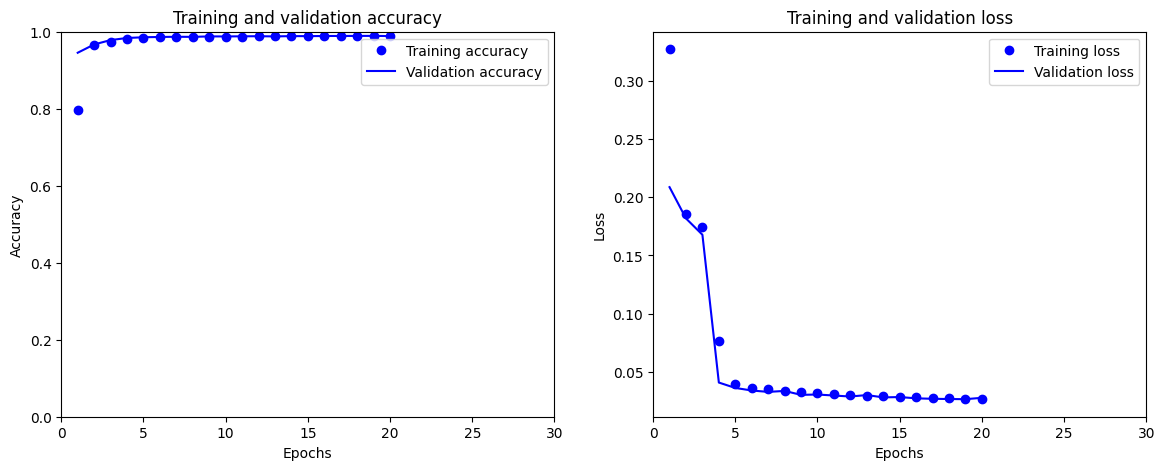

In [42]:
def plot_performance(history):
    # Récupérer l'historique de l'entraînement
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    # Tracer la courbe de précision
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Limite de l'axe y de 0 à 1 pour accuracy
    plt.xlim(0, 30)  # Limite de l'axe x de 0 à 20 pour epochs
    plt.legend()
    
    # Tracer la courbe de perte
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim(0, 30)  # Limite de l'axe x de 0 à 20 pour epochs
    plt.legend()
    
    plt.show()
    
# Tracer les courbes de performance
plot_performance(history)

Pour le graphe "Training and validation accuracy"
- La précision sur les données d’entraînement devient très rapidement proche de 1.0, ce qui signifie que le modèle fait très peu d’erreurs sur les données qu’il a vues.
- La précision sur les données de validation est également très élevée, ce qui montre que le modèle fonctionne bien sur des données nouvelles qu’il n’a pas vues pendant l’entraînement.

Pour le graphe "Training and validation loss"

- La perte sur les données d’entraînement diminue rapidement et reste très basse, ce qui montre que le modèle apprend bien.
- La perte sur les données de validation suit une tendance similaire et reste également très basse, ce qui signifie que le modèle ne fait pas d’erreurs importantes sur des données nouvelles.

Les deux graphes montrent que le modèle a une très bonne performance :

- La précision élevée pour l’entraînement et la validation indique que le modèle prédit correctement la plupart du temps.
- La perte faible pour l’entraînement et la validation montre que le modèle fait peu d’erreurs.

Pour rappel, cette apprentissage est un peu plus dur que l'apprentissage précédente car on demande à notre modèle le réseau neuronne de détecter uniquement la matière grises et la matière blanche.

In [43]:
# Initialisation des listes pour stocker les résultats et une liste coupe_patients
dice = []
prediction_coupe = []
coupe_patients = [f'subject-{i}' for i in range(9, 11)]

# Nous allons parcourir toute la liste des patients
for i, id_p in enumerate(coupe_patients):
    
    # Chargez les images pour le patient courant
    patient_img_data = processe_img_pat(id_p)
    T1, T2, VT = patient_img_data['T1'], patient_img_data['T2'], patient_img_data['LABEL']

    # Ici on normalise les modalités T1, T2 et un array numpy X
    T1_NORM = normalize_data(T1)
    T2_NORM = normalize_data(T2)
    X = np.zeros((1, T1_NORM.shape[0], T1_NORM.shape[1], 3))

    for j in range(VT.shape[2]):
        X = np.zeros((1, T1_NORM.shape[0], T1_NORM.shape[1], 3))
        Y = np.zeros((1, T1_NORM.shape[0], T1_NORM.shape[1]))
        
        # Remplissage de X avec T1, T2 normalisés
        X[0, :, :, 0] = T1_NORM[:, :, j].squeeze()
        X[0, :, :, 1] = T2_NORM[:, :, j].squeeze()
        
        # Copie de X pour la prédiction
        X_PREDICTION = X[0, :, :, :2].copy()
        # Prédiction avec le modèle
        Y_PREDICTION = model.predict(np.expand_dims(X_PREDICTION, axis=0), verbose=0)
        
        # Ajout de la prédiction au tableau X
        X[0, :, :, 2]=Y_PREDICTION.squeeze()
        # Conversion de VT en masque binaire pour Y
        Y[0, :, :] = np.where(VT[:, :, j] > 10, 1, 0).squeeze()
        
        # Prédiction avec le deuxième modèle (model2)
        Y_PREDICTION_2 = model2.predict(X, verbose = 0)
        # Seuillage de Y_PREDICTION_2 à 0.5
        Y_PREDICTION_2 = np.where(Y_PREDICTION_2 > 0.5 , 1, 0)

        # Calcul du coefficient de Dice
        COEFF_DICE = calculation_coeff_dice(Y_PREDICTION_2.squeeze(), Y.squeeze())
        
        # On récupere tout les coeff de prediction du Dice sont qui sont sup(0)
        if COEFF_DICE > 0:
            prediction_coupe.append((X, Y, Y_PREDICTION_2, COEFF_DICE))

        dice.append(COEFF_DICE)

# Calcul de la moyenne des coefficients de Dice non nuls
all_coeff_dice = [i for i in dice if i > 0]
result = calcul_moyenne_coeff_dice(all_coeff_dice)
print("La valeur du Dice : ", result)

La valeur du Dice :  0.9528582247406114


In [44]:
images_pour_step_6 = [(X[0, :, :, 0], X[0, :, :, 1], Y[0, :, :], Y_pred[0, :, :, 0]) for X, Y, Y_pred,_ in prediction_coupe]
print("Nombres d'image : ", len(images_pour_step_6))

Nombres d'image :  192


In [ ]:
# Vérification de la structure de images
print(f"Type of images: {type(images_pour_step_6)}")
if isinstance(images_pour_step_6, list):
    print(f"Length of images: {len(images_pour_step_6)}")
    for idx, item in enumerate(images_pour_step_6):
        print(f"Type of item {idx}: {type(item)}")
        if isinstance(item, (list, tuple)):
            print(f"Length of item {idx}: {len(item)}")
            for sub_idx, sub_item in enumerate(item):
                print(f"Type of sub_item {sub_idx} in item {idx}: {type(sub_item)}, shape: {sub_item.shape if hasattr(sub_item, 'shape') else 'N/A'}")

# Visualisation des images
names = {
    0: "IRM T1",
    1: "IRM T2",
    2: "VT",
    3: "PREDICTION"
}

# Itération sur les tuples d'images
for images_tuple in images_pour_step_6:
    plt.figure(figsize=(15, 5))
    for i, (img, name) in enumerate(zip(images_tuple, names.values()), start=1):
        plt.subplot(1, len(images_tuple), i)
        plt.imshow(img, cmap='viridis')
        plt.title(name)
        plt.axis('off')
    plt.show()

#### Analyse des résultat de prédiction obtenue pour la step 6

La prédiction qu'on a obtenue à l'aide de notre deuxième model de réseau neuronne (CNN). Dans les résultats qu'on a obtenue, on peut maintenant distinguer et savoir ou se situe les matières blanches et les matières grise. Maintenant qu'on a la matière blanche et la matière grise, on pourra la comparer à la VT (vérité terrain absolu car la vérité terrain pour rappel, c'est un radiologue qui l'a réalisé). On observe qu'on a quasiment la même chose à quelques détails près mais lorsqu'on zoom sur nos résultats, on remarque qu'il y a quand même des différences et que ce n'est **pas encore parfait**. On a donc pas pu prédire ce qu'on voulait et on peut donc le quantifier par le dice qu'on a obtenue qui est de **0.9528582247406114**. Le dice qu'on a obtenue est clairement en dessous de ce que le sujet nous demande (Dice_sujet qui entre 0.96 et 0.97). On est clairement à 0.01 en dessous donc notre modèle n'est pas parfait.

## Step 7 : Programmation de l’étage 3 de la cascade et regroupement en données finales

Nous allons encore une fois reproduire le même schéma que dans les step précédent. Donc on refait de même mais avec cette fois ci 4 canaux dans l’input et on ne prédit que la zone de matière grise.

In [46]:
def processe_data(coupe_patients, coupe_labels, model, model1):
    try:
        # Obtention des informations pertinentes à partir des étiquettes de coupes
        infos = nb_img_3D_to_slices_pertinents(coupe_labels)
    except ValueError as e:
        print(f"Erreur lors de l'obtention des informations : {e}")
        return None, None

    try:
        # Initialisation des tableaux X et Y selon les informations obtenues
        X = np.zeros((infos["NBCOUPES"], infos["SX"], infos["SY"], 4))
        Y = np.zeros((infos["NBCOUPES"], infos["SX"], infos["SY"]))
    except KeyError as e:
        print(f"Clé manquante dans les informations : {e}")
        return None, None
    except Exception as e:
        print(f"Erreur lors de la création des tableaux X et Y : {e}")
        return None, None

    # Initialisation du compteur de coupes
    NUMCOUPE = 0

    # Parcours de tous les patients dans la liste coupe_patients
    for id_p in coupe_patients:
        try:
            # Chargement des données d'image pour le patient actuel
            patient_img_data = processe_img_pat(id_p)
        except ValueError as e:
            print(f"Erreur lors du traitement du patient {id_p} : {e}")
            continue

        try:
            # Extraction des modalités T1, T2 et VT des données du patient
            T1, T2, VT = patient_img_data['T1'], patient_img_data['T2'], patient_img_data['LABEL']
        except KeyError as e:
            print(f"Clé manquante dans les données du patient {id_p} : {e}")
            continue

        # Normalisation des modalités T1 et T2
        T1_NORM = normalize_data(T1)
        T2_NORM = normalize_data(T2)

        #  Itération à travers les tranches de VT
        for value in range(VT.shape[2]):
            try:
                 # Vérification si la somme des valeurs supérieures à 150 dans VT est > 100
                if np.sum(np.where(VT[:, :, value] > 150, 1, 0)) > 100:
                    # Stockez les coupes normalisées et la VT convertie en masque binaire
                    X[NUMCOUPE, :, :, 0] = T1_NORM[:, :, value].squeeze()
                    X[NUMCOUPE, :, :, 1] = T2_NORM[:, :, value].squeeze()
                    INPUT_PREDICTION_1 = X[NUMCOUPE, :, :, :2].copy()

                    # Vérifier la dimension avant la prédiction
                    if INPUT_PREDICTION_1.shape[-1] != 2:
                        print(f"Nombre de canaux incorrect pour la prédiction à la coupe {value} du patient {id_p}")
                        continue

                    # Prédiction avec model
                    Y_PREDICTION = model.predict(np.expand_dims(INPUT_PREDICTION_1, axis=0), verbose=0)
                    
                    # Gestion des dimensions de la prédiction Y_PREDICTION
                    if Y_PREDICTION.shape[-1] == 1:
                        Y_PREDICTION = np.squeeze(Y_PREDICTION, axis=-1)
                    elif Y_PREDICTION.shape[-1] != 1:
                        print(f"Erreur inattendue dans les dimensions de Y_pred pour la coupe {value} du patient {id_p}")
                        continue
                    
                    # Stockage de la prédiction dans X
                    X[NUMCOUPE, :, :, 2] = Y_PREDICTION.squeeze()
                    
                    # Copie de X pour la prédiction avec model1
                    INPUT_PREDICTION_2=X[NUMCOUPE, :, :, :3].copy()
                    # Vérification de la dimension avant la prédiction avec model1
                    if INPUT_PREDICTION_2.shape[-1] != 3:
                        print(f"Nombre de canaux incorrect pour la prédiction à la coupe {value} du patient {id_p}")
                        continue
                    
                    # Prédiction avec model1
                    Y_PREDICTION_2 = model2.predict(np.expand_dims(INPUT_PREDICTION_2, axis=0), verbose = 0)
                    
                    # Gestion des dimensions de la prédiction Y_PREDICTION_2
                    if Y_PREDICTION_2.shape[-1] == 1:
                        Y_PREDICTION_2 = np.squeeze(Y_PREDICTION_2, axis=-1)
                    elif Y_PREDICTION_2.shape[-1] != 1:
                        print(f"Erreur inattendue dans les dimensions de Y_pred pour la coupe {value} du patient {id_p}")
                        continue
                    
                    # Stockage de la prédiction dans X
                    X[NUMCOUPE, :, :, 3] = Y_PREDICTION_2.squeeze()
                    # Stockage de VT converti en masque binaire dans Y
                    Y[NUMCOUPE, :, :] = np.where(VT[:, :, value] > 150, 1, 0).squeeze()
                    NUMCOUPE += 1
            except IndexError as e:
                print(f"Erreur d'index lors du traitement de la coupe {z} du patient {id_p} : {e}")
                continue
            except Exception as e:
                print(f"Erreur inattendue lors du traitement de la coupe {z} du patient {id_p} : {e}")
                continue

    return X, Y

In [47]:
LABEL_TRAINING_3 = [f'subject-{i}-label' for i in range(1, 7)]
PATIENTS_TRAINING_3 = [f'subject-{i}' for i in range(1, 7)]

LABEL_VALIDATION_3 = [f'subject-{i}-label' for i in range(7, 9)]
PATIENTS_VALIDATION_3 = [f'subject-{i}' for i in range(7, 9)]

X_TRAIN_3, Y_TRAIN_3 = processe_data(PATIENTS_TRAINING_3, LABEL_TRAINING_3, model, model2)
X_VALIDATION_3, Y_VALIDATION_3 = processe_data(PATIENTS_VALIDATION_3, LABEL_VALIDATION_3, model, model2)

print(X_TRAIN_3)
print(Y_TRAIN_3)
print(X_VALIDATION_3)
print(Y_VALIDATION_3)

[[[[0.00000000e+00 0.00000000e+00 3.16915939e-05 2.81987083e-03]
   [0.00000000e+00 0.00000000e+00 1.58793512e-08 2.16169556e-05]
   [0.00000000e+00 0.00000000e+00 3.85194460e-10 7.44799308e-07]
   ...
   [0.00000000e+00 0.00000000e+00 2.04624415e-10 1.65396108e-09]
   [0.00000000e+00 0.00000000e+00 4.04015009e-06 3.88454495e-08]
   [0.00000000e+00 0.00000000e+00 4.12142975e-03 1.99838294e-04]]

  [[0.00000000e+00 0.00000000e+00 4.82291860e-08 4.74534347e-04]
   [0.00000000e+00 0.00000000e+00 1.19133734e-13 3.19635978e-06]
   [0.00000000e+00 0.00000000e+00 3.71061708e-17 5.56912099e-08]
   ...
   [0.00000000e+00 0.00000000e+00 1.87871741e-21 1.37538386e-12]
   [0.00000000e+00 0.00000000e+00 4.59673938e-14 3.21538934e-10]
   [0.00000000e+00 0.00000000e+00 4.30171070e-07 2.17374822e-04]]

  [[0.00000000e+00 0.00000000e+00 1.18846363e-10 6.66926382e-04]
   [0.00000000e+00 0.00000000e+00 2.22711556e-18 2.35289940e-06]
   [0.00000000e+00 0.00000000e+00 5.75620380e-23 2.70166840e-08]
   ...


In [48]:
nbf64 = 8
nbf128 = 2 * nbf64
nbf256 = 2 * nbf128
nbf512 = 2 * nbf256
nbf1024 = 2 * nbf512

def unet3(pretrained_weights = None,input_size = (144, 192, 4), lr=1e-4):
    inputs = Input(input_size)
    conv1 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(nbf1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(nbf1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(nbf512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(nbf512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(nbf256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(nbf256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(nbf128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(nbf128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(nbf64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    print(inputs)
    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)
    return model

In [49]:
model3 = unet3()

<KerasTensor shape=(None, 144, 192, 4), dtype=float32, sparse=None, name=keras_tensor_78>


In [50]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

In [51]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)

In [52]:
history = model3.fit(x=X_TRAIN_3,
          y=Y_TRAIN_3,
          shuffle=True,
          validation_data=(X_VALIDATION_3, Y_VALIDATION_3),
          epochs=20,
          batch_size=1,
          callbacks=[reduce_lr, early_stopping],
          validation_freq=1)

Epoch 1/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.8817 - loss: 0.3343 - val_accuracy: 0.9274 - val_loss: 0.1407 - learning_rate: 1.0000e-04
Epoch 2/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.9462 - loss: 0.1150 - val_accuracy: 0.9432 - val_loss: 0.1145 - learning_rate: 1.0000e-04
Epoch 3/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9545 - loss: 0.0998 - val_accuracy: 0.9476 - val_loss: 0.1078 - learning_rate: 1.0000e-04
Epoch 4/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.9606 - loss: 0.0870 - val_accuracy: 0.9554 - val_loss: 0.0953 - learning_rate: 1.0000e-04
Epoch 5/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.9619 - loss: 0.0849 - val_accuracy: 0.9529 - val_loss: 0.0993 - learning_rate: 1.0000e-04
Epoch 6/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.9614 - loss: 0.0858 - val_accuracy: 0.9552 - val_loss: 0.0957 - learning_rate: 1.0000e-04
Epoch 7/20
599/599 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/ste

In [53]:
loss, accuracy = model3.evaluate(X_VALIDATION_3, Y_VALIDATION_3)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.9612 - loss: 0.0899
Validation Accuracy: 96.57%


In [54]:
loss, accuracy = model3.evaluate(X_TRAIN_3, Y_TRAIN_3)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.9638 - loss: 0.0798
Validation Accuracy: 96.92%


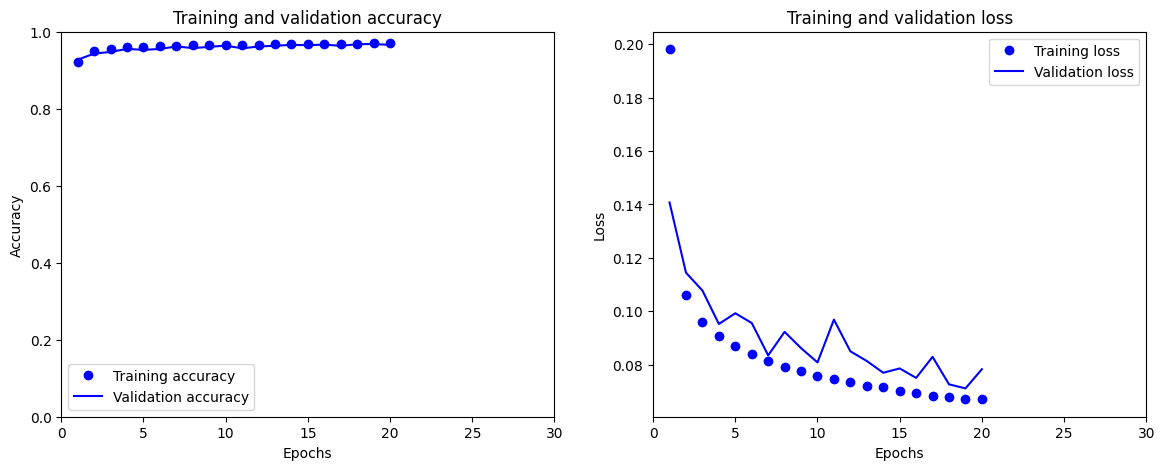

In [55]:
def plot_performance(history):
    # Récupérer l'historique de l'entraînement
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    # Tracer la courbe de précision
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Limite de l'axe y de 0 à 1 pour accuracy
    plt.xlim(0, 30)  # Limite de l'axe x de 0 à 20 pour epochs
    plt.legend()
    
    # Tracer la courbe de perte
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim(0, 30)  # Limite de l'axe x de 0 à 20 pour epochs
    plt.legend()
    
    plt.show()
    
# Tracer les courbes de performance
plot_performance(history)

Pour le graphe "Training and validation accuracy"
- La précision sur les données d’entraînement devient un peu moins rapide que les autres modèle, ce qui signifie que le modèle fait très peu d’erreurs sur les données qu’il a vues et beaucoup plus compliqué.
- La précision sur les données de validation est également très élevée, ce qui montre que le modèle fonctionne bien sur des données nouvelles qu’il n’a pas vues pendant l’entraînement.

Pour le graphe "Training and validation loss"

- La perte sur les données d’entraînement diminue rapidement et devient de plus en plus basse, ce qui montre que le modèle apprend bien.
- La perte sur les données de validation suit une tendance similaire et reste également très basse, ce qui signifie que le modèle ne fait pas d’erreurs importantes sur des données nouvelles.

Les deux graphes montrent que le modèle a une très bonne performance :

- La précision élevée pour l’entraînement et la validation indique que le modèle prédit correctement la plupart du temps.
- La perte faible pour l’entraînement et la validation montre que le modèle fait peu d’erreurs.

Pour rappel, cette apprentissage est un beaucoup plus dur que l'apprentissage précédente car on demande à notre modèle le réseau neuronne de détecter uniquement la matière grises.

In [56]:
# Initialisation des listes pour stocker les résultats et une liste coupe_patients
dice = []
prediction_coupe = []
coupe_patients = [f'subject-{i}' for i in range(9, 11)]

# Nous allons parcourir toute la liste des patients
for i, id_p in enumerate(coupe_patients):
    
    # Chargez les images pour le patient courant
    patient_img_data = processe_img_pat(id_p)
    T1, T2, VT = patient_img_data['T1'], patient_img_data['T2'], patient_img_data['LABEL']

    # Ici on normalise les modalités T1, T2 et un array numpy X
    T1_NORM = normalize_data(T1)
    T2_NORM = normalize_data(T2)
    X = np.zeros((1, T1_NORM.shape[0], T1_NORM.shape[1], 4))

     # Boucle sur les tranches de VT
    for j in range(VT.shape[2]):
        X = np.zeros((1, T1_NORM.shape[0], T1_NORM.shape[1], 4))
        Y = np.zeros((1, T1_NORM.shape[0], T1_NORM.shape[1]))
        
        # Assignation des modalités T1 et T2 à X
        X[0, :, :, 0] = T1_NORM[:, :, j].squeeze()
        X[0, :, :, 1] = T2_NORM[:, :, j].squeeze()
        
        # Première prédiction avec model sur T1 et T2
        X_PREDICTION = X[0, :, :, :2].copy()
        Y_PREDICTION = model.predict(np.expand_dims(X_PREDICTION, axis=0), verbose=0)
        X[0, :, :, 2]=Y_PREDICTION.squeeze()
        
        # Deuxième prédiction avec model2 sur T1, T2 et la première prédiction
        X_PREDICTION_2 = X[0, :, :, :3].copy()
        Y_PREDICTION_2=model2.predict(np.expand_dims(X_PREDICTION_2, axis=0), verbose=0)
        X[0, :, :, 3]=Y_PREDICTION_2.squeeze()

        # Assignation de VT à Y en tant que masque binaire
        Y[0, :, :] = np.where(VT[:, :, j] > 150, 1, 0).squeeze()

        # Troisième prédiction avec model3 sur l'ensemble de X
        Y_PREDICTION_3 = model3.predict(X, verbose = 0)
        Y_PREDICTION_3 = np.where(Y_PREDICTION_3 > 0.5,1,0)

        # Calcul du coefficient de Dice
        COEFF_DICE = calculation_coeff_dice(Y_PREDICTION_3.squeeze(), Y.squeeze())
        
        # On récupere tout les coeff de prediction du Dice sont qui sont sup(0.99)
        if COEFF_DICE > 0:
            prediction_coupe.append((X, Y, Y_PREDICTION_3, COEFF_DICE))

        dice.append(COEFF_DICE)

# Calcul de la moyenne des coefficients de Dice non nuls
all_coeff_dice = [i for i in dice if i > 0]
result = calcul_moyenne_coeff_dice(all_coeff_dice)
print("La valeur du Dice : ", result)

La valeur du Dice :  0.7205118068916861


In [57]:
images_pour_step_7 = [(X[0, :, :, 0], X[0, :, :, 1], Y[0, :, :], Y_pred[0, :, :, 0]) for X, Y, Y_pred,_ in prediction_coupe]
print("Nombres d'image : ", len(images_pour_step_7))

Nombres d'image :  180


In [ ]:
# Vérification de la structure de images
print(f"Type of images: {type(images_pour_step_7)}")
if isinstance(images_pour_step_7, list):
    print(f"Length of images: {len(images_pour_step_7)}")
    for idx, item in enumerate(images_pour_step_7):
        print(f"Type of item {idx}: {type(item)}")
        if isinstance(item, (list, tuple)):
            print(f"Length of item {idx}: {len(item)}")
            for sub_idx, sub_item in enumerate(item):
                print(f"Type of sub_item {sub_idx} in item {idx}: {type(sub_item)}, shape: {sub_item.shape if hasattr(sub_item, 'shape') else 'N/A'}")

# Visualisation des images
names = {
    0: "IRM T1",
    1: "IRM T2",
    2: "VT",
    3: "PREDICTION"
}

# Itération sur les tuples d'images
for images_tuple in images_pour_step_7:
    plt.figure(figsize=(15, 5))
    for i, (img, name) in enumerate(zip(images_tuple, names.values()), start=1):
        plt.subplot(1, len(images_tuple), i)
        plt.imshow(img, cmap='viridis')
        plt.title(name)
        plt.axis('off')
    plt.show()

### Analyse des résultats obtenue au step 7

La prédiction qu'on a obtenue à l'aide de notre troisième model de réseau neuronne (CNN). Dans les résultats qu'on a obtenue, on peut maintenant distinguer et savoir ou se situe les matières grise. Maintenant qu'on a la matière grise, on pourra la comparer à la VT vérité terrain absolu car la vérité terrain. On observe qu'on a pas exactement la même chose sans même besoin d'avoir zoomer sur les résultats. De plus, on remarque qu'il y a quand même énormement de différences et que ce n'est **pas du tout parfait**. On a donc pas pu prédire ce qu'on voulait et on peut donc le quantifier par le dice qu'on a obtenue qui est de **0.7246317836863411**. Le dice qu'on a obtenue est clairement en dessous de ce que le sujet nous demande (Dice_sujet environ 0.84). On est clairement en dessous en terme de prédiction de Dice. Nous pouvons encore améliorer notre modèle de réseau neuronnes en découpant mieux mes images 3D et d'avoir un peu plus de donnée pour que mes modèles soient encore plus performant tout en fessant attention à ne pas sur-apprendre..